In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
df = pd.read_csv('PEP1.csv')

### 1.	Understand the dataset:

#### a.	Identify the shape of the dataset

In [8]:
df.shape

(1460, 81)

#### b.	Identify variables with null values

In [55]:
df_nulls = pd.DataFrame(df.isna().sum(),columns=['Nulls'])

In [51]:
df_nulls = df_nulls[df_nulls.Nulls != 0]

In [52]:
df_nulls

,Nulls
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### c.	Identify variables with unique values

In [40]:
for cols in df.columns:
    print(cols, ":")
    print(df[cols].value_counts())
    print("#"*40)

Id :
1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
########################################
MSSubClass :
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
########################################
MSZoning :
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
########################################
LotFrontage :
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
########################################
LotArea :
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotAr

In [41]:
for cols in df.columns:
    print(cols, ":")
    print(df[cols].unique())
    print("#"*40)

Id :
[   1    2    3 ... 1458 1459 1460]
########################################
MSSubClass :
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
########################################
MSZoning :
['RL' 'RM' 'C (all)' 'FV' 'RH']
########################################
LotFrontage :
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
########################################
LotArea :
[ 8450  9600 11250 ... 17217 13175  9717]
########################################
Street

### 2.	Generate a separate dataset for numerical and categorical variables

In [42]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df_columns = numeric_df.columns

In [43]:
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [44]:
numeric_df_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [45]:
categorical_df = df.select_dtypes(exclude=[np.number])
categorical_df_columns = categorical_df.columns

In [46]:
categorical_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [47]:
categorical_df_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### 3.	EDA of numerical variables:

#### a.	Missing value treatment

In [56]:
numeric_df.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [63]:
numeric_df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [64]:
numeric_df.MasVnrArea.median()

0.0

In [65]:
numeric_df['GarageYrBlt'].fillna(numeric_df.GarageYrBlt.median(),inplace=True)
numeric_df['LotFrontage'].fillna(numeric_df.LotFrontage.median(),inplace=True)
numeric_df['MasVnrArea'].fillna(numeric_df.MasVnrArea.median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [66]:
numeric_df.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

#### b.	Identify the skewness and distribution

In [67]:

numeric_df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

0  skewness =  0.0
1  skewness =  1.4076567471495591
2  skewness =  2.4091466665496006
3  skewness =  12.207687851233496
4  skewness =  0.2169439277628693
5  skewness =  0.6930674724842182
6  skewness =  -0.613461172488183
7  skewness =  -0.5035620027004709
8  skewness =  2.6776164510820997
9  skewness =  1.685503071910789
10  skewness =  4.255261108933303
11  skewness =  0.9202684528039037
12  skewness =  1.5242545490627664
13  skewness =  1.3767566220336365
14  skewness =  0.8130298163023265
15  skewness =  9.011341288465387
16  skewness =  1.3665603560164552
17  skewness =  0.596066609663168
18  skewness =  4.103402697955168
19  skewness =  0.036561558402727165
20  skewness =  0.675897448233722
21  skewness =  0.21179009627507137
22  skewness =  4.488396777072859
23  skewness =  0.6763408364355531
24  skewness =  0.6495651830548841
25  skewness =  -0.6783329490955604
26  skewness =  -0.3425489297486655
27  skewness =  0.17998090674623907
28  skewness =  1.5413757571931312
29  skewne

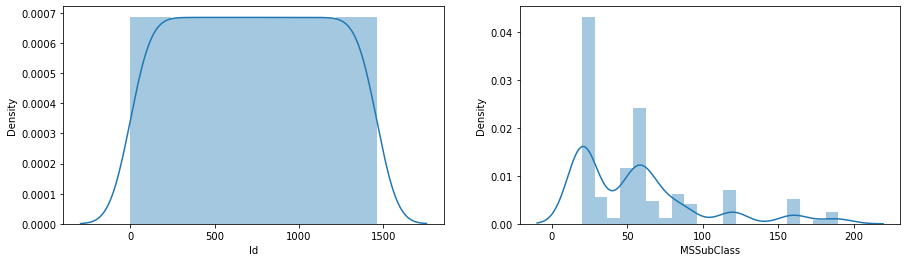

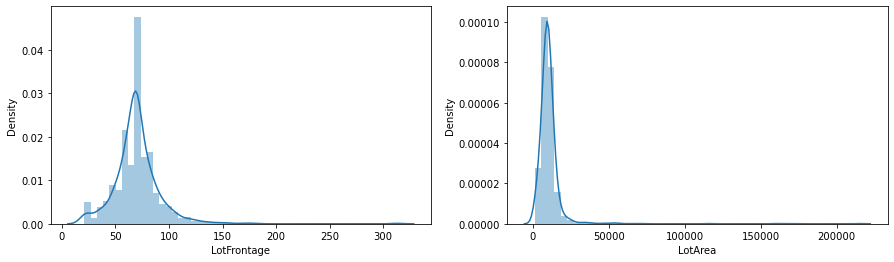

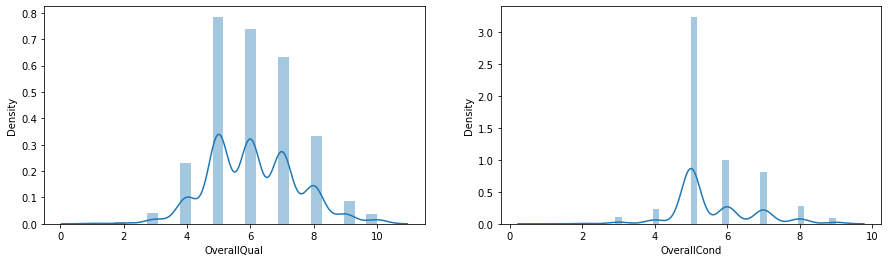

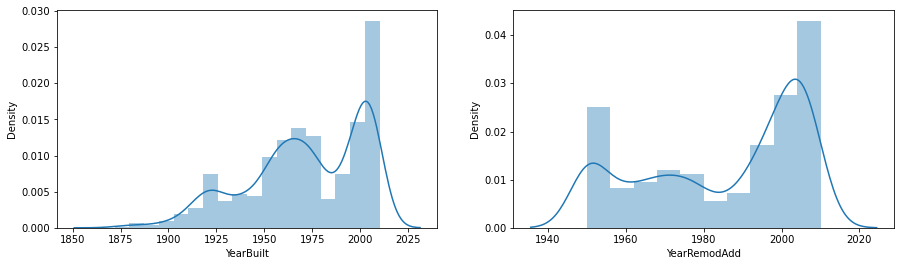

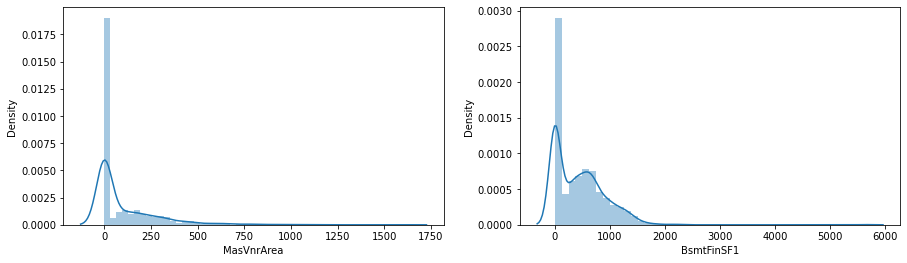

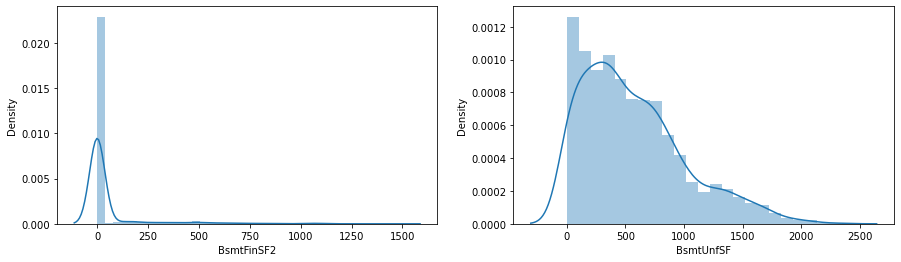

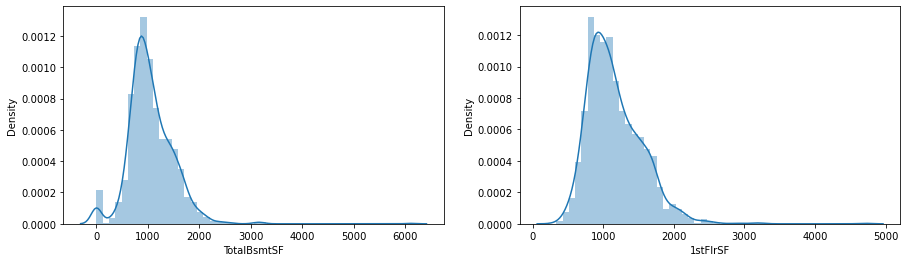

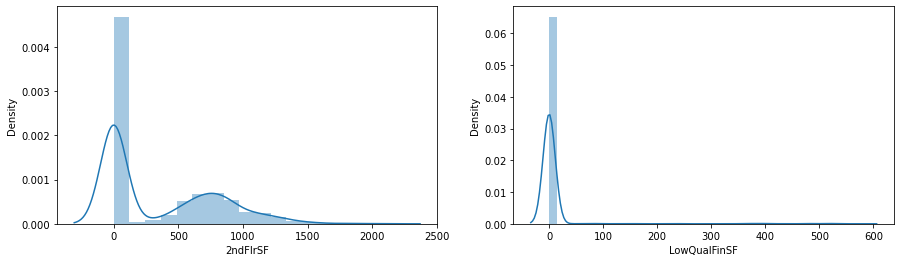

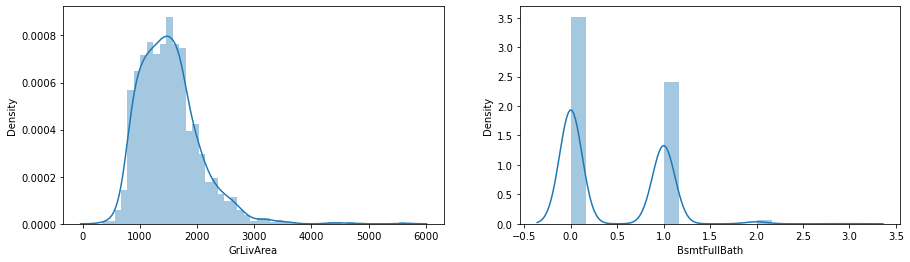

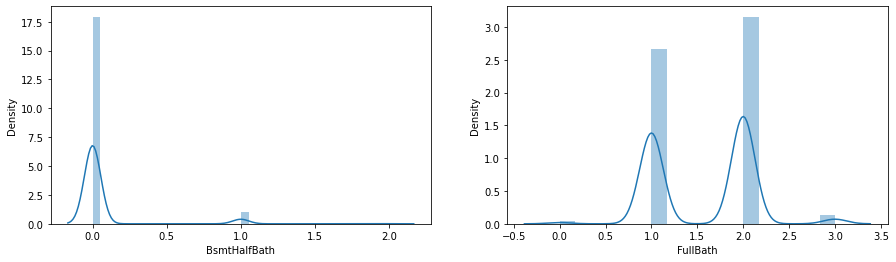

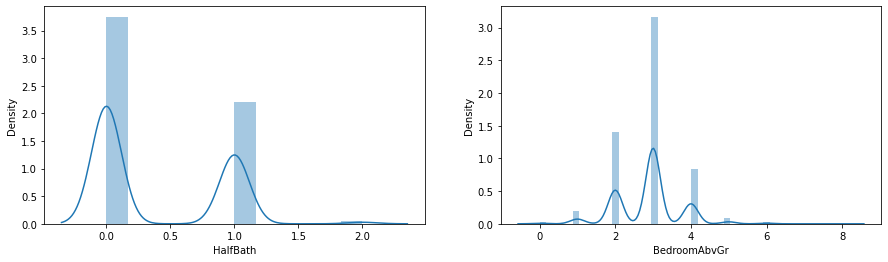

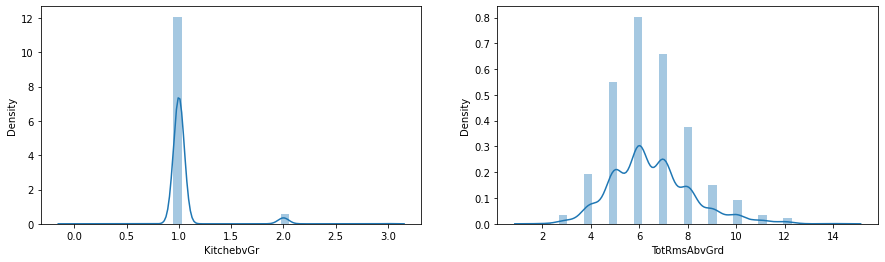

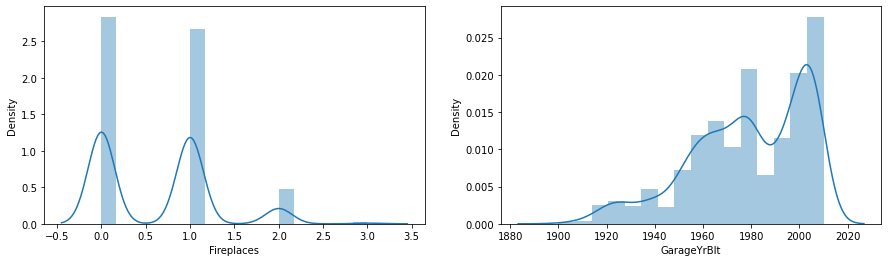

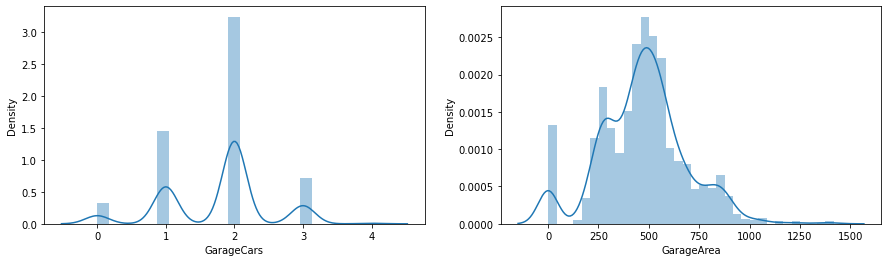

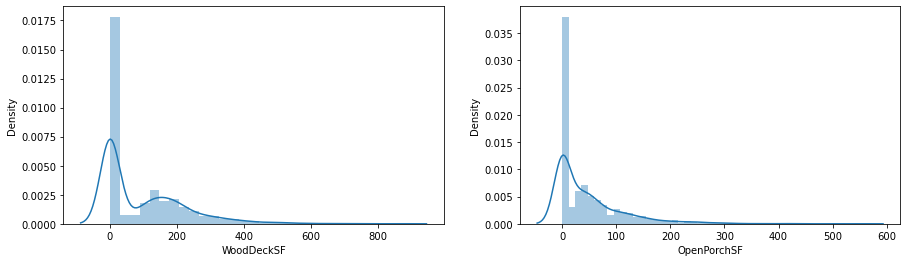

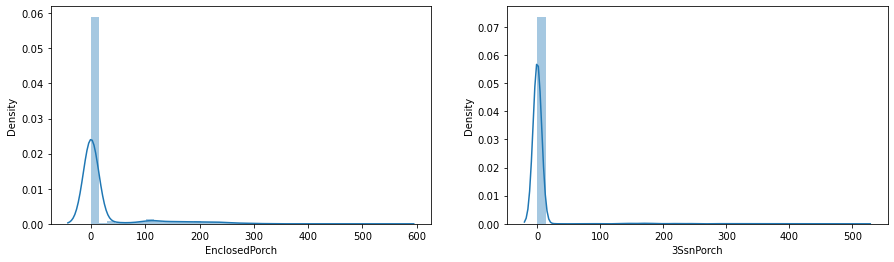

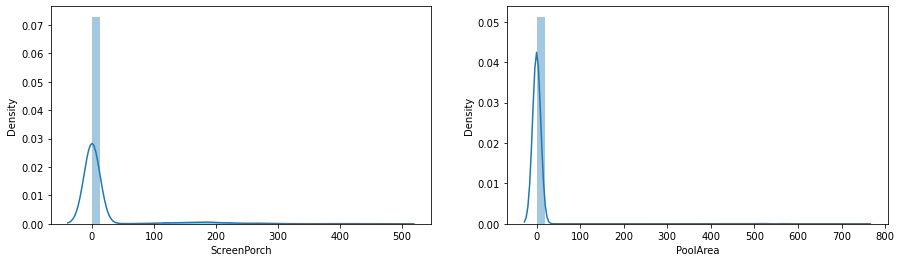

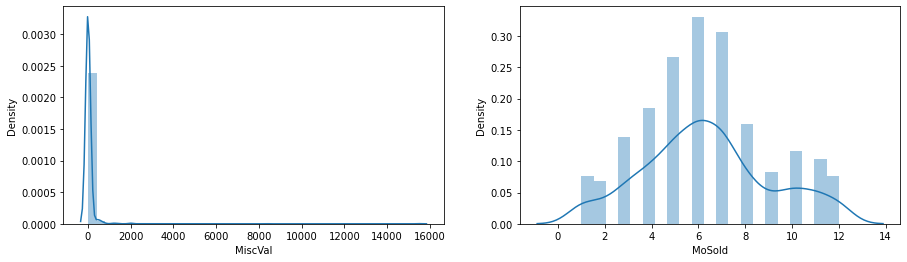

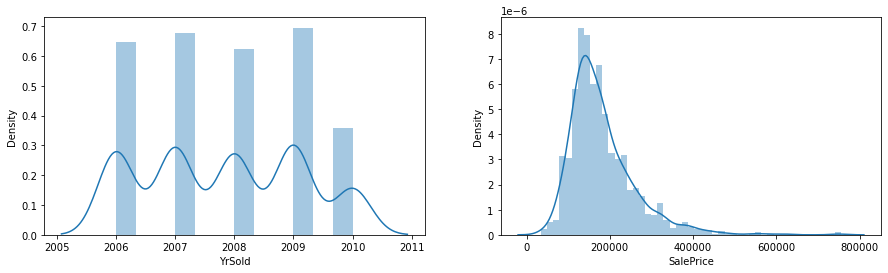

In [72]:

for i in range(0,len(numeric_df_columns),2):
    print(i, " skewness = ",numeric_df[numeric_df_columns[i]].skew())
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(numeric_df[numeric_df_columns[i]])
    print(i+1, " skewness = ",numeric_df[numeric_df_columns[i+1]].skew())
    plt.subplot(122)
    sns.distplot(numeric_df[numeric_df_columns[i+1]])

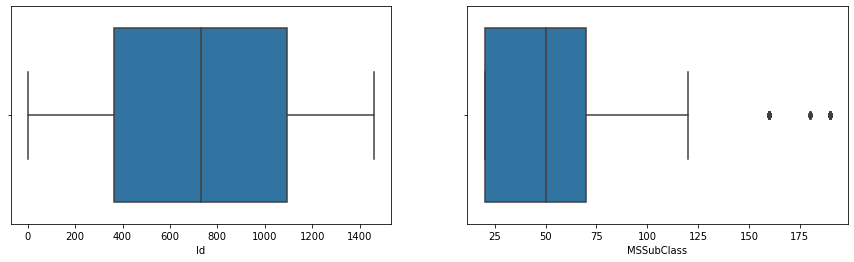

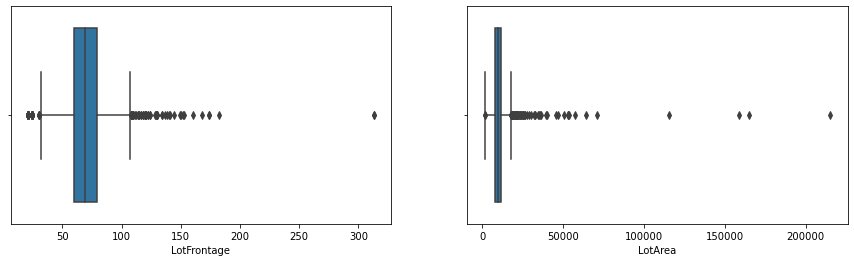

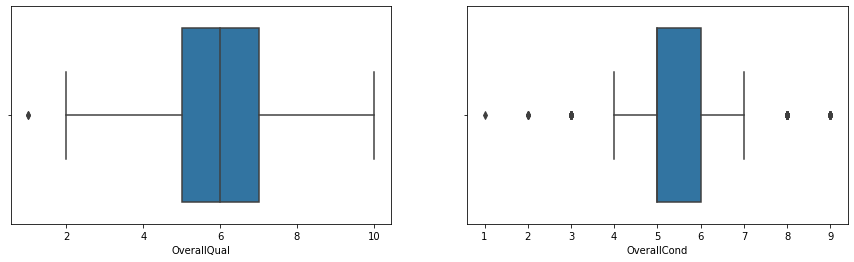

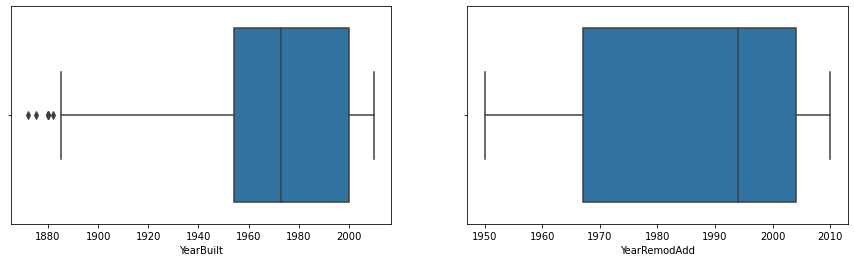

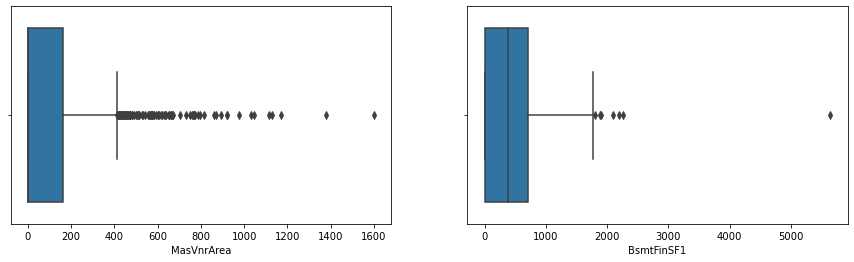

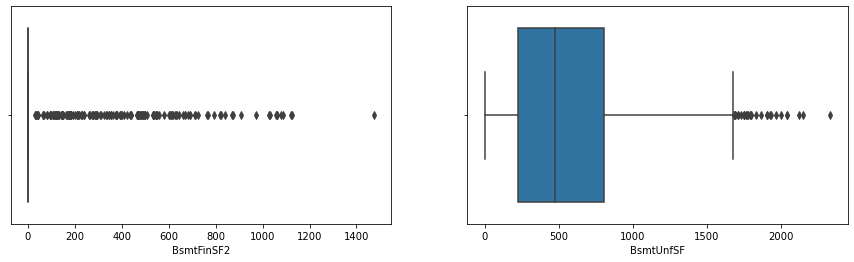

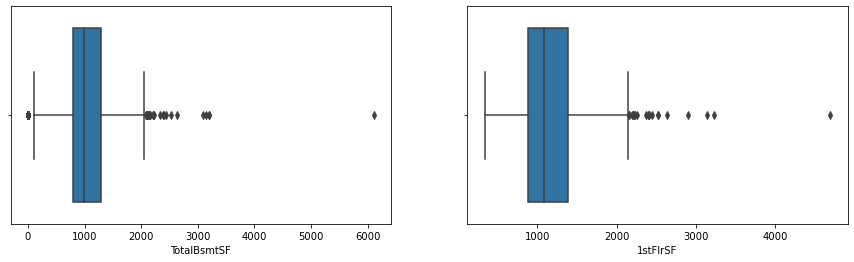

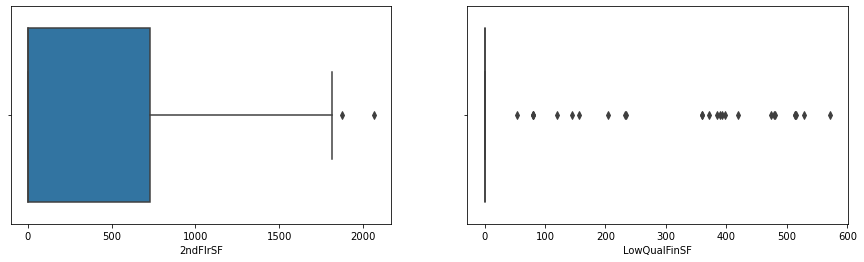

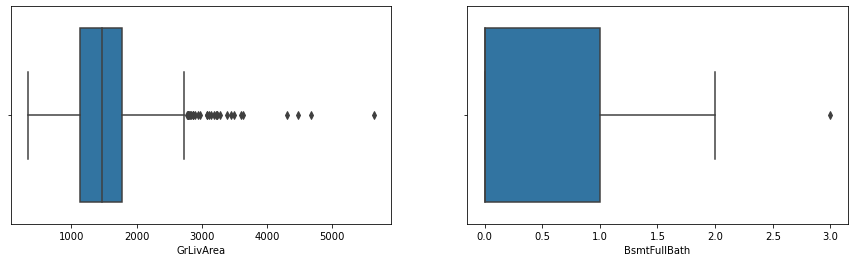

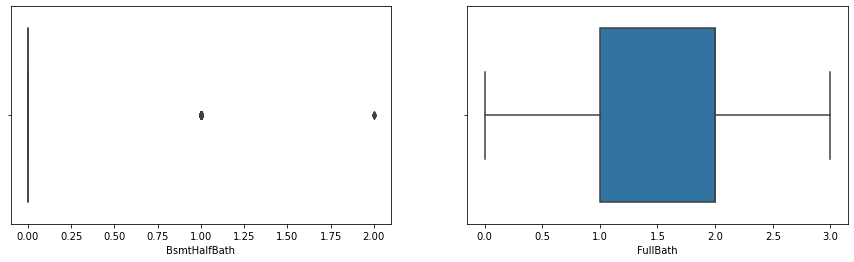

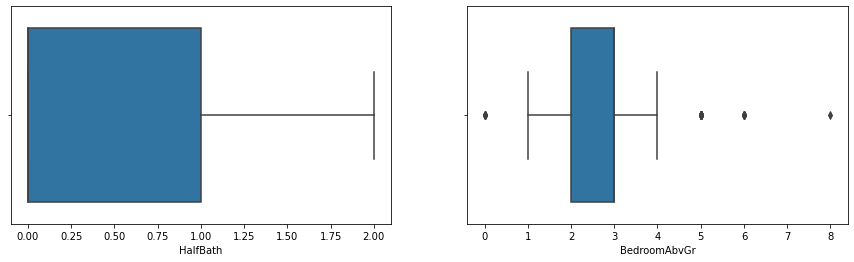

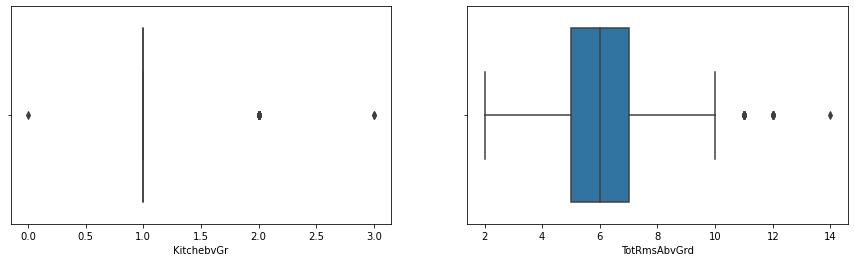

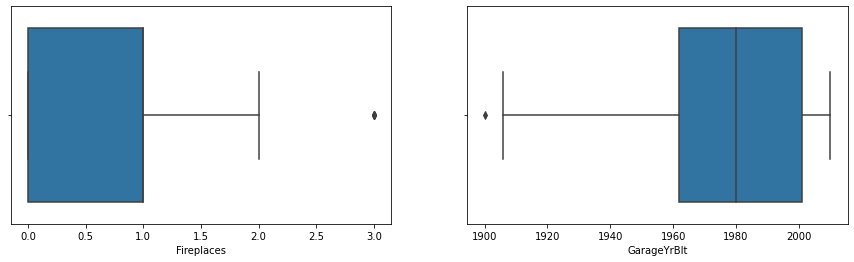

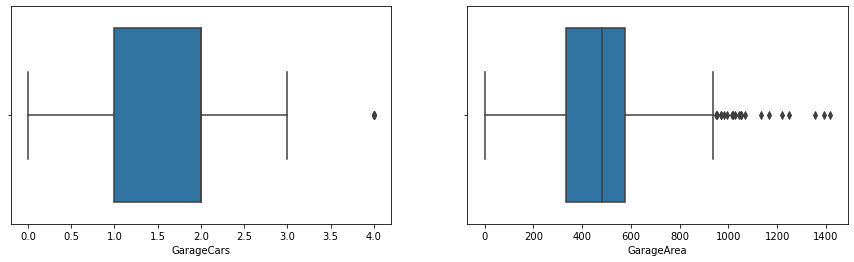

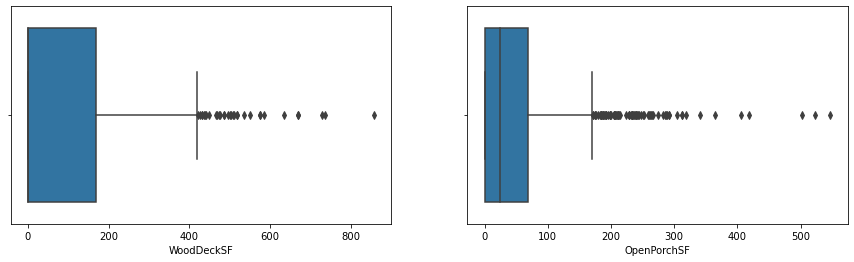

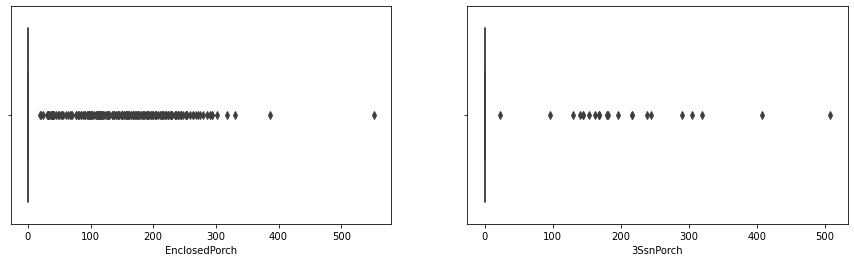

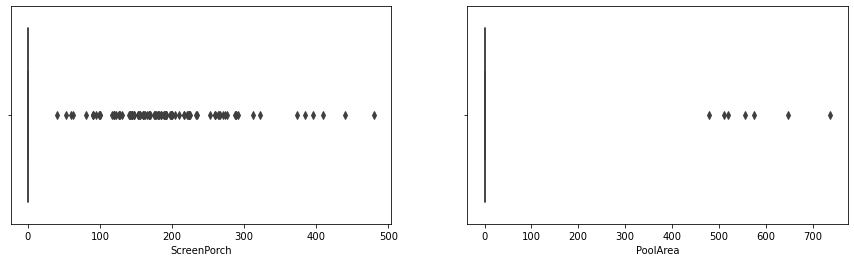

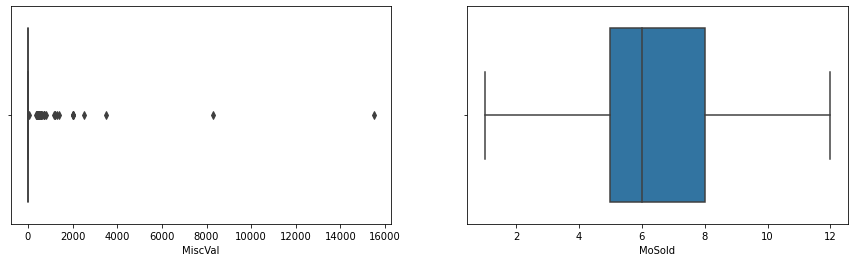

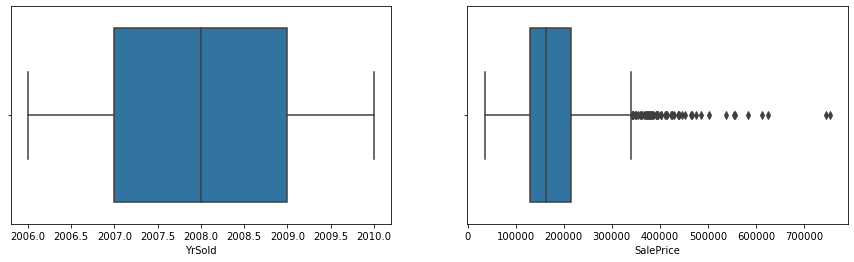

In [73]:

for i in range(0,len(numeric_df_columns),2):
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.boxplot(numeric_df[numeric_df_columns[i]])
    plt.subplot(122)
    sns.boxplot(numeric_df[numeric_df_columns[i+1]])

#### c.	Identify significant variables using a correlation matrix 

<AxesSubplot:>

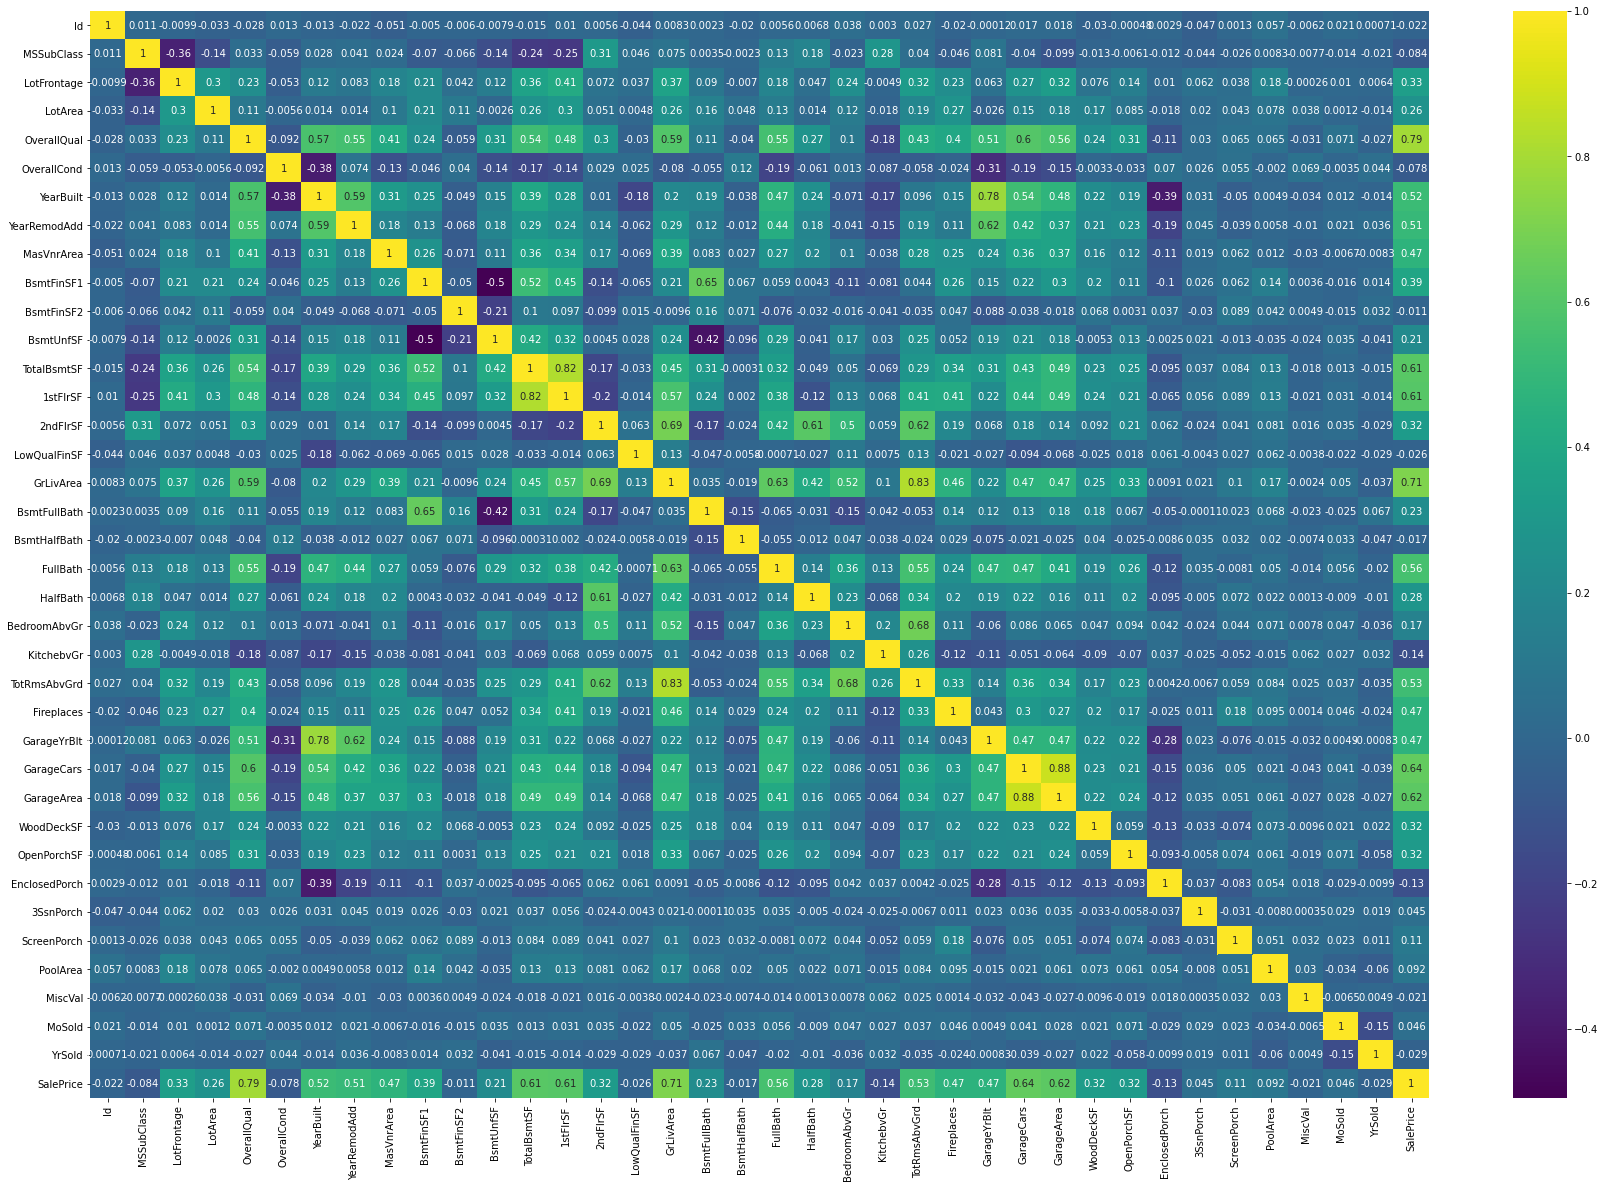

In [74]:
plt.figure(figsize=(30,20))
sns.heatmap(numeric_df.corr(),cmap='viridis',annot=True)

 Findings are :- 1stFlrSF & TotalBsmtSF are highly correlated - 0.82, need to drop any one with lower value of correlation with SalePrice
                 -- GrLivArea & TotalRmsAbvGrd are highly correlated - 0.83, need to drop any one with lower value of correlation with SalePrice
                 -- GrgYrBlt & YearBuilt are highly correlated - 0.78, need to drop any one with lower value of correlation with SalePrice
               --TotalRmsAbvGrd & BathAbvGrnd are highly correlated - 0.68, need to drop any one with lower value of correlation with SalePrice
               --GarageArea & Garagecars are highly correlated - 0.88, need to drop any one with lower value of correlation with SalePrice

In [79]:
numeric_df.corr().nlargest(10,'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [80]:
selected_columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']

In [81]:
selected_df = numeric_df[selected_columns]

<AxesSubplot:>

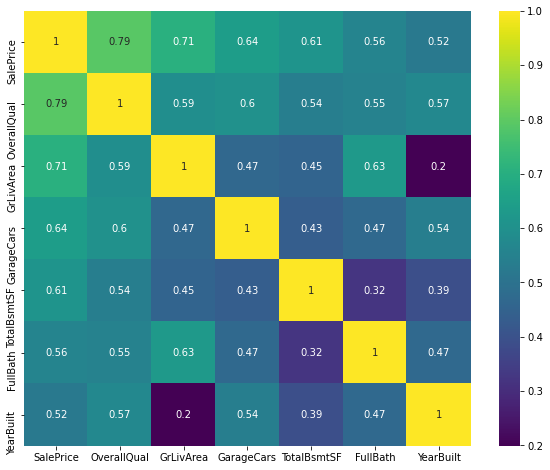

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(selected_df.corr(),cmap='viridis',annot=True)

#### d.	Pair plot for distribution and density

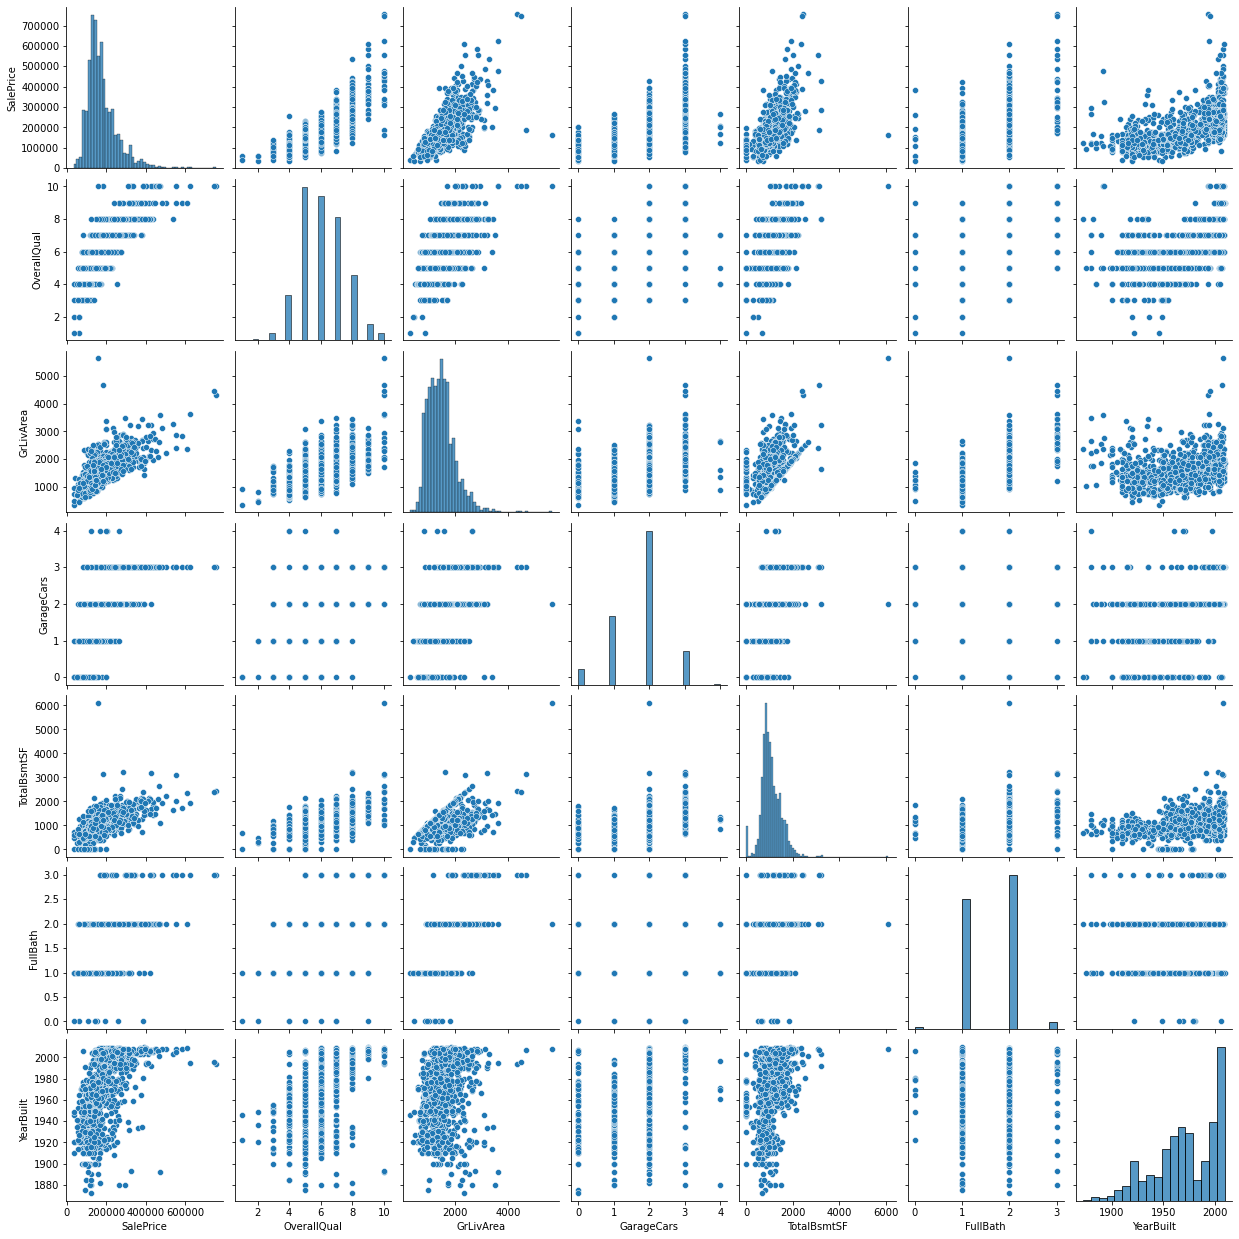

In [83]:
sns.pairplot(selected_df)

### 4.	EDA of categorical variables

#### a.	Missing value treatment

In [84]:
categorical_df.shape

(1460, 43)

In [85]:
categorical_df.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [87]:
categorical_df.isna().sum()/1460*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functiol          0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [88]:
drop_columns = ['MiscFeature','Fence','PoolQC','FireplaceQu','Alley']
categorical_df.drop(drop_columns,axis=1,inplace=True)

In [90]:
categorical_df.isna().sum()/1460*100

MSZoning         0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
KitchenQual      0.000000
Functiol         0.000000
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PavedDrive       0.000000
SaleType         0.000000
SaleCondition    0.000000
dtype: float

In [91]:
categorical_df.mode()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [93]:
categorical_df.GarageType.mode()[0]

'Attchd'

In [94]:
categorical_df['GarageType'].fillna(categorical_df.GarageType.mode()[0],inplace=True)
categorical_df['BsmtQual'].fillna(categorical_df['BsmtQual'].mode()[0],inplace = True)
categorical_df['BsmtCond'].fillna(categorical_df['BsmtCond'].mode()[0],inplace = True)
categorical_df['BsmtExposure'].fillna(categorical_df['BsmtExposure'].mode()[0],inplace = True)
categorical_df['BsmtFinType1'].fillna(categorical_df['BsmtFinType1'].mode()[0],inplace = True)
categorical_df['BsmtFinType2'].fillna(categorical_df['BsmtFinType2'].mode()[0],inplace = True)
categorical_df['MasVnrType'].fillna(categorical_df['MasVnrType'].mode()[0],inplace = True)
categorical_df['Electrical'].fillna(categorical_df['Electrical'].mode()[0],inplace = True)

categorical_df['GarageType'].fillna(categorical_df['GarageType'].mode()[0],inplace = True)
categorical_df['GarageFinish'].fillna(categorical_df['GarageFinish'].mode()[0],inplace = True)
categorical_df['GarageQual'].fillna(categorical_df['GarageQual'].mode()[0],inplace = True)
categorical_df['GarageCond'].fillna(categorical_df['GarageCond'].mode()[0],inplace = True)


In [95]:
categorical_df.isna().sum()/1460*100

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functiol         0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

#### b.	Count plot and box plot for bivariate analysis

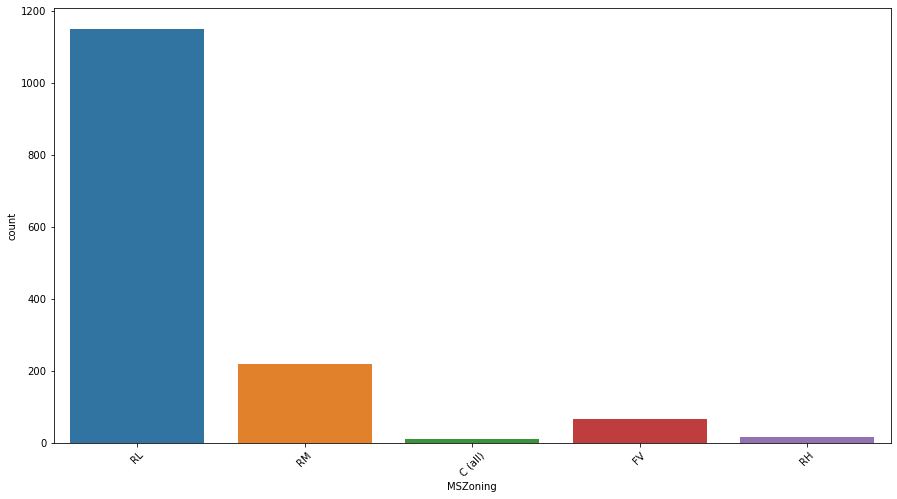

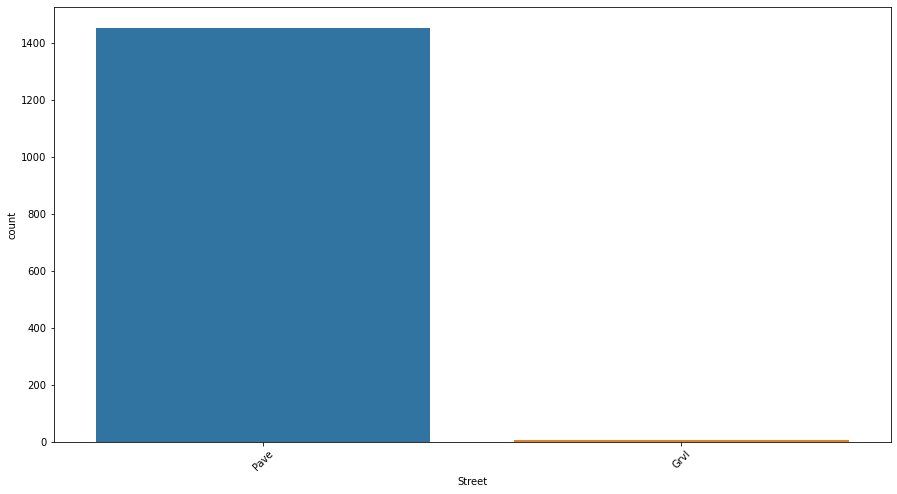

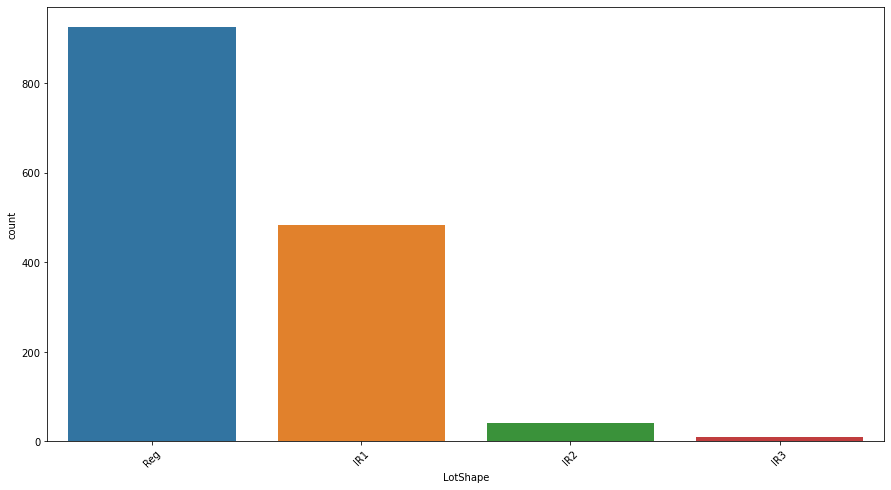

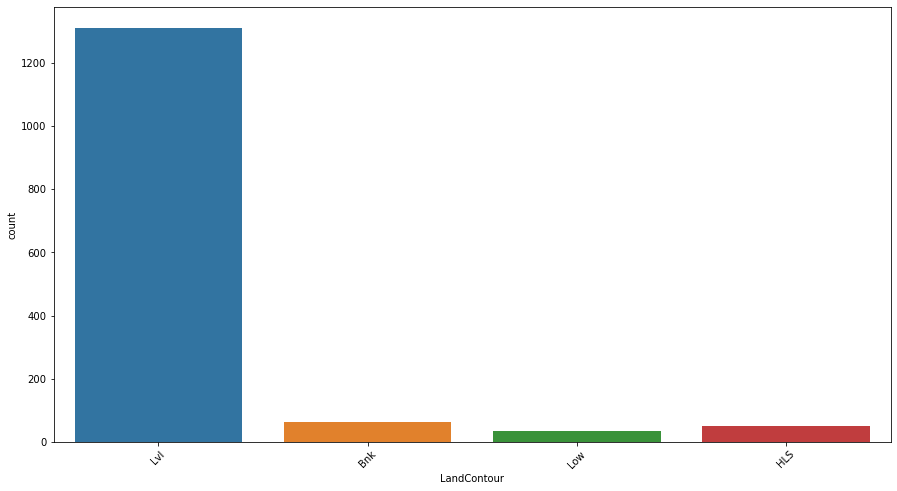

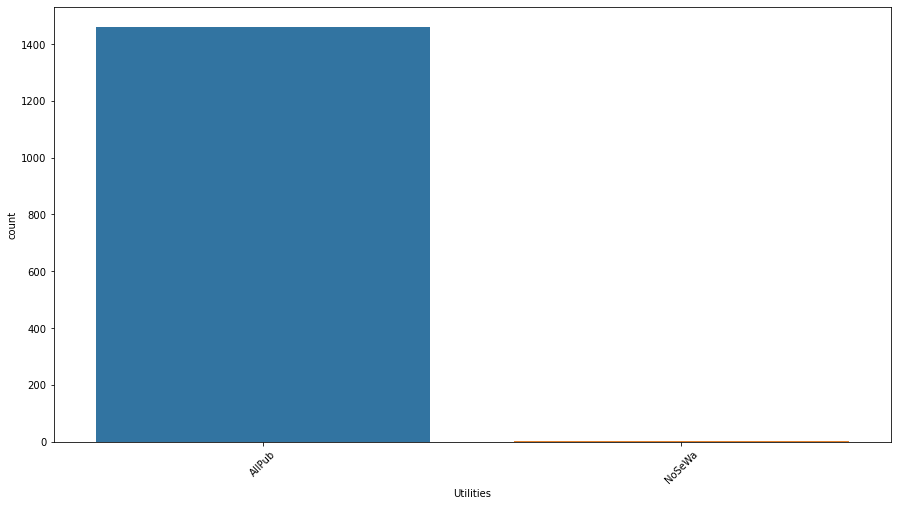

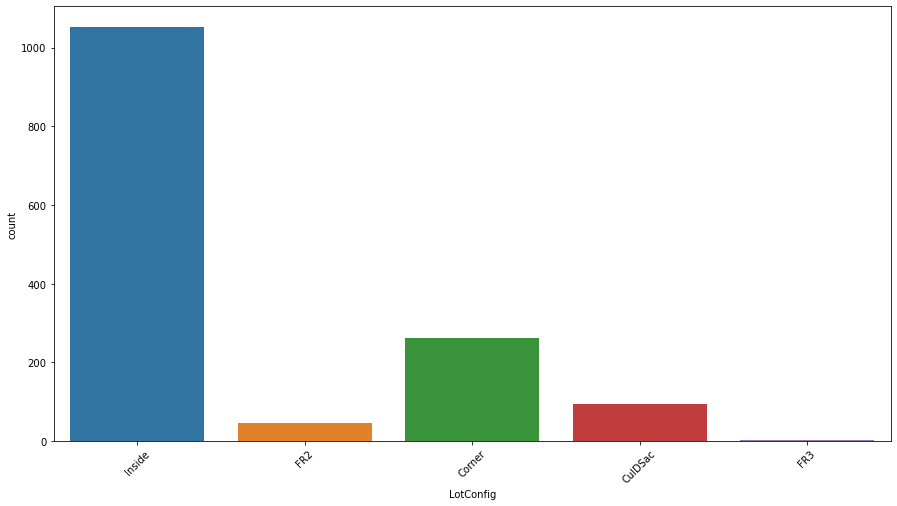

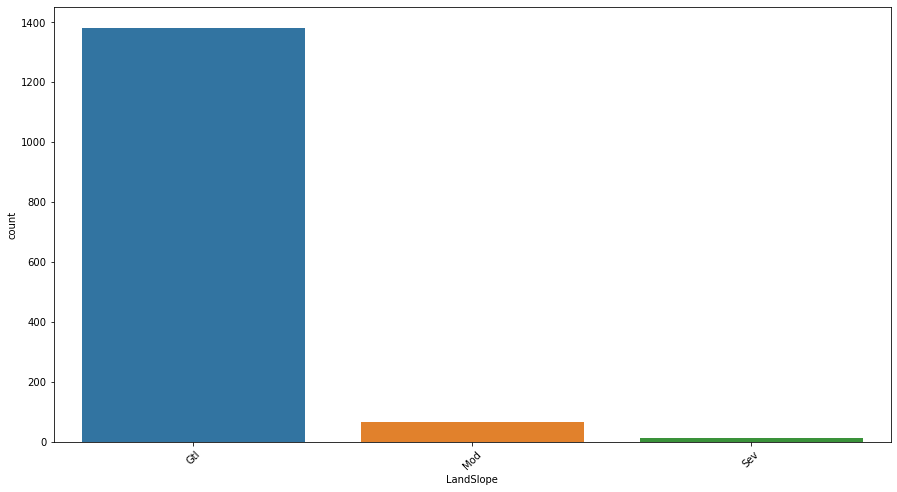

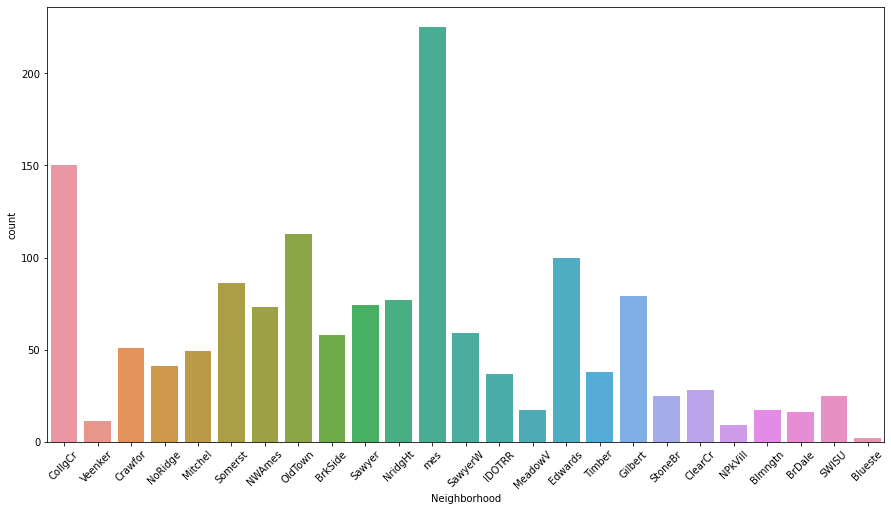

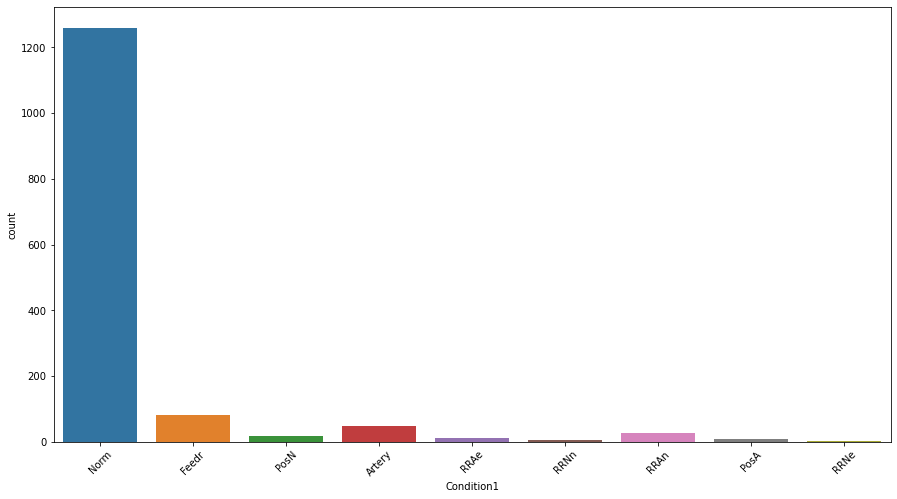

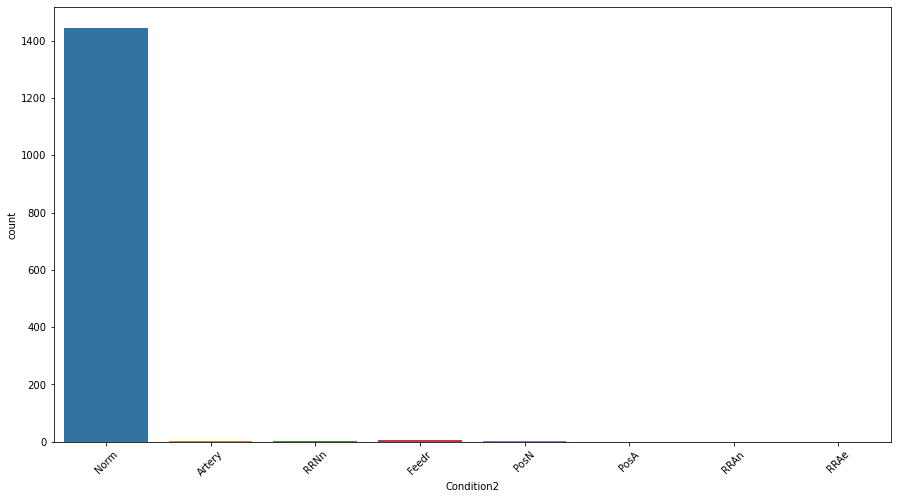

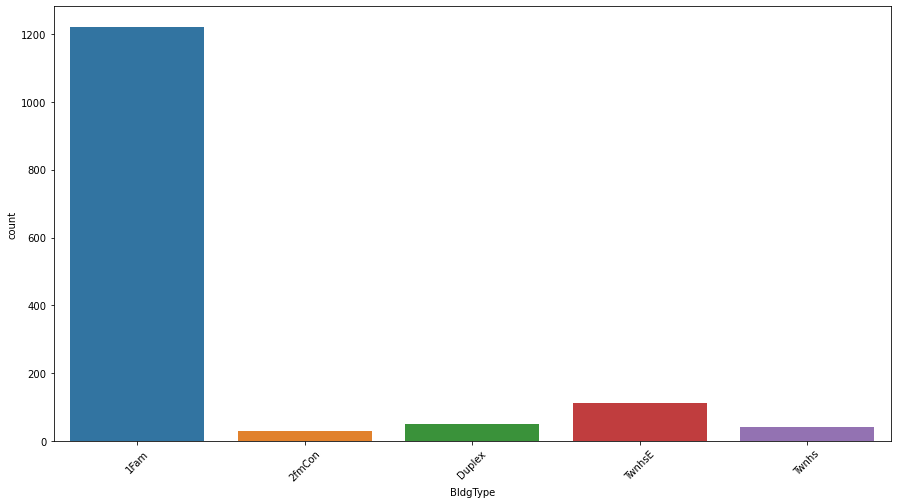

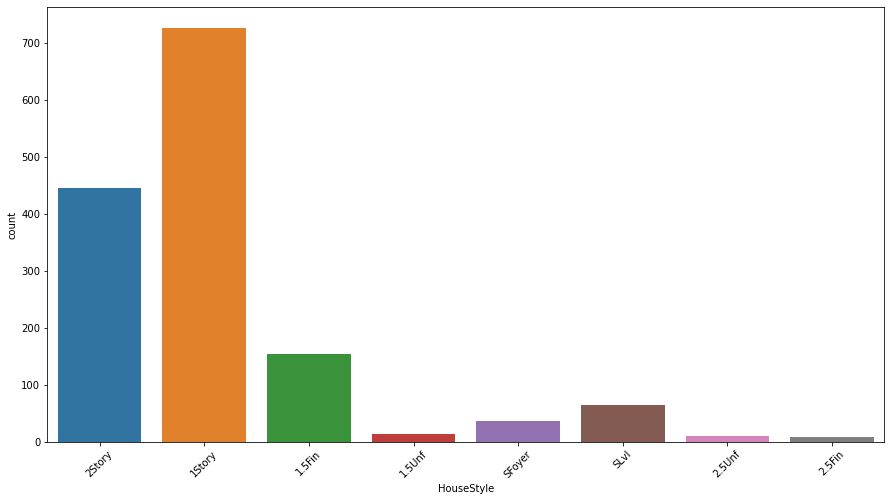

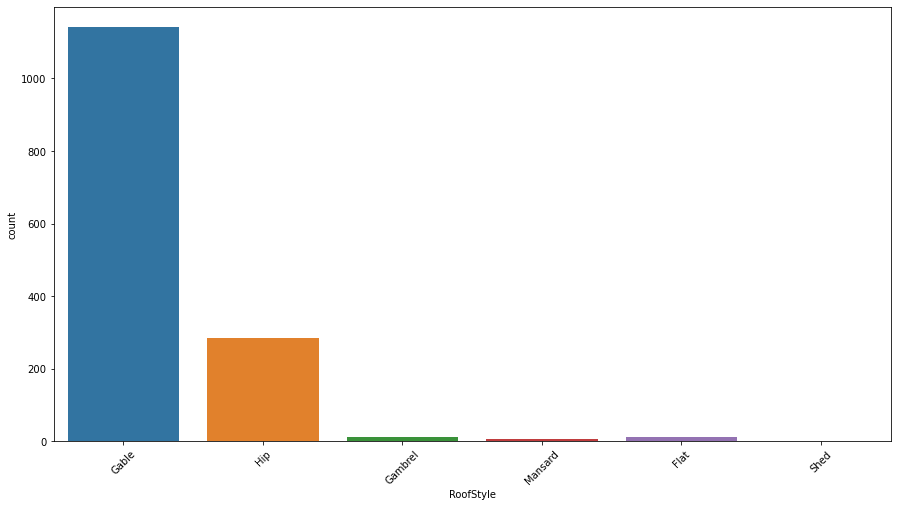

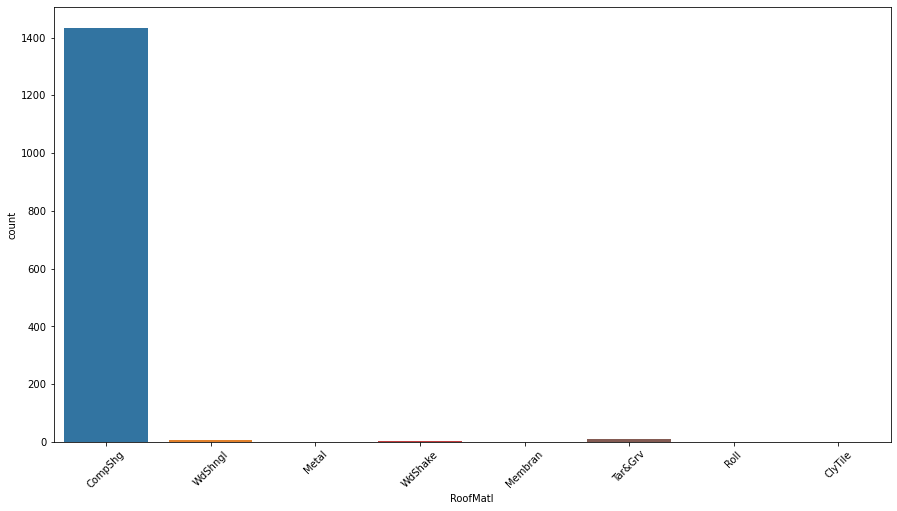

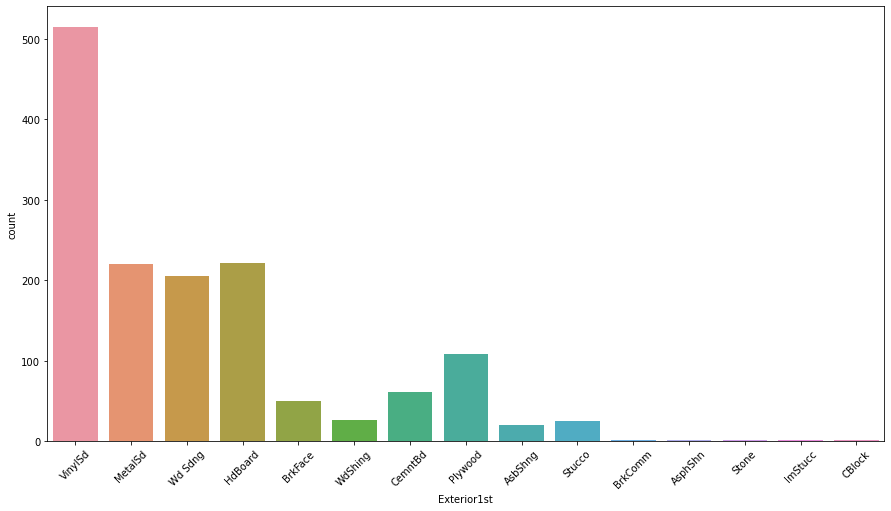

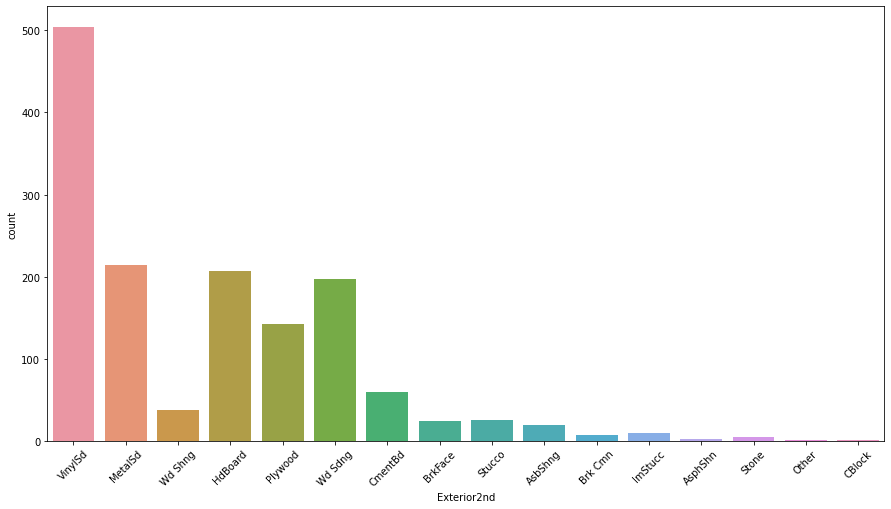

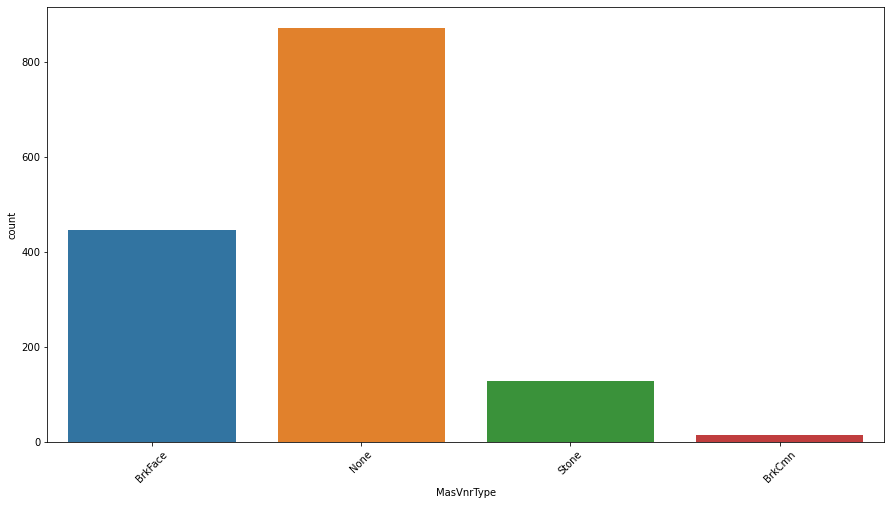

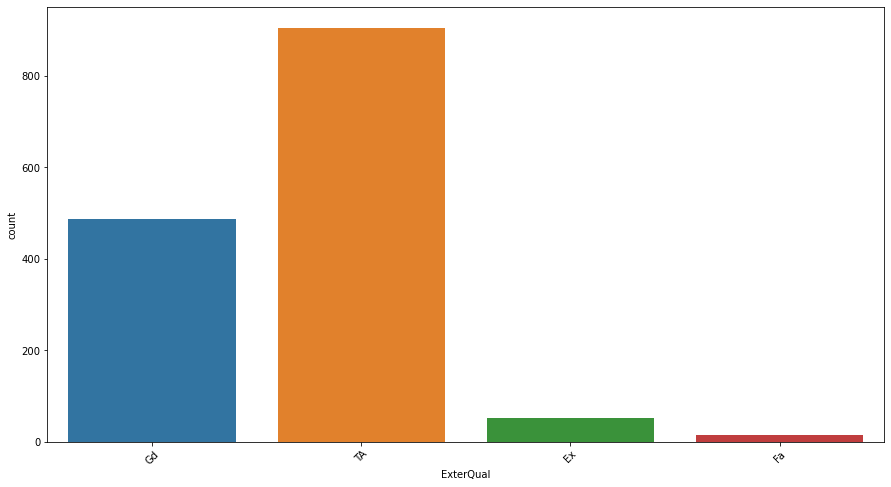

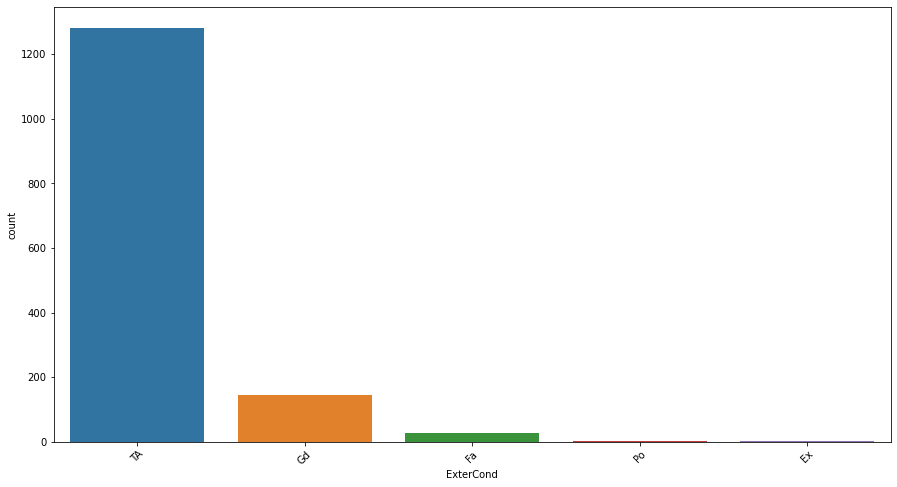

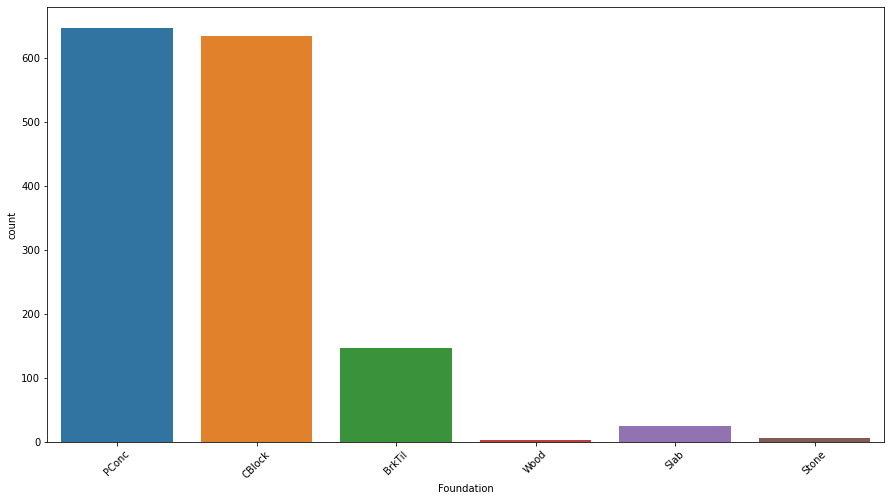

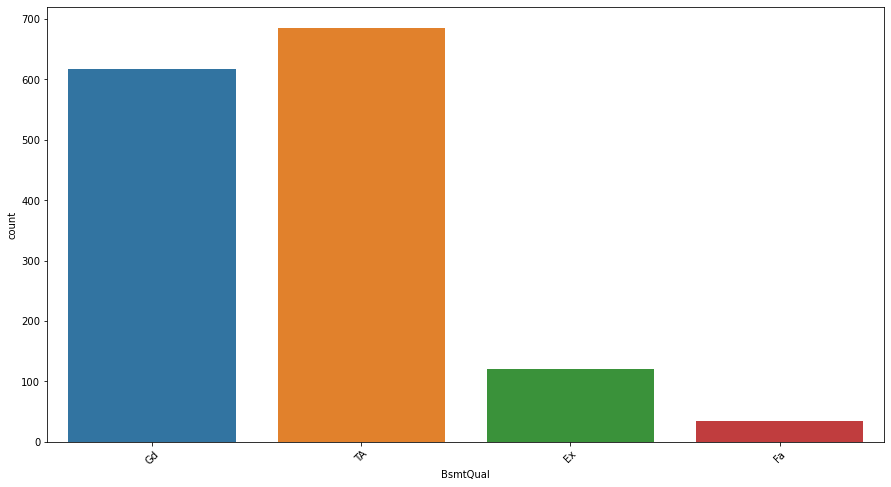

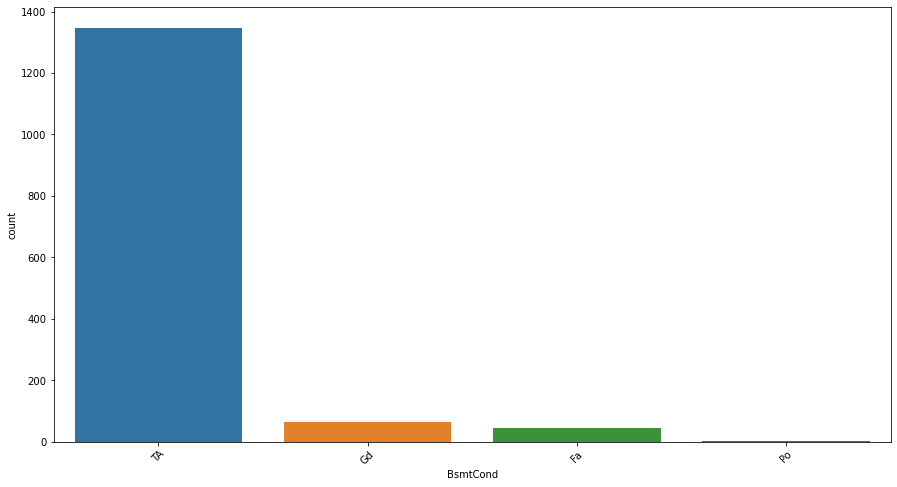

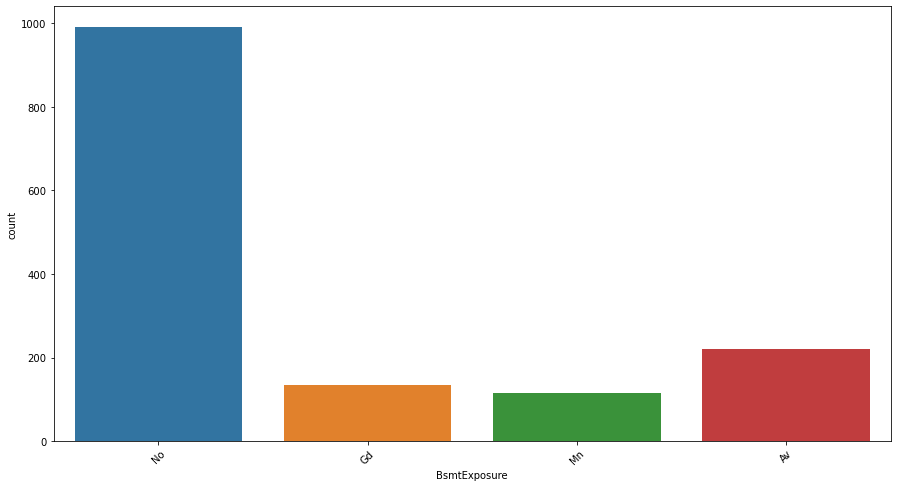

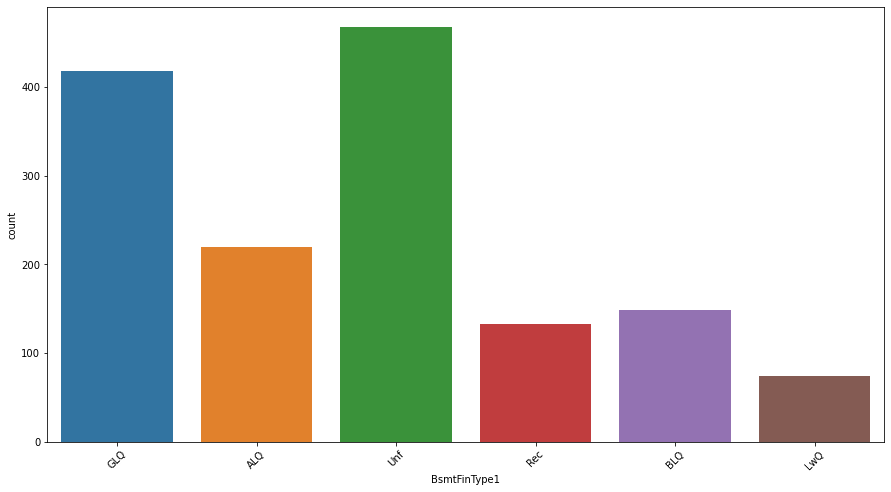

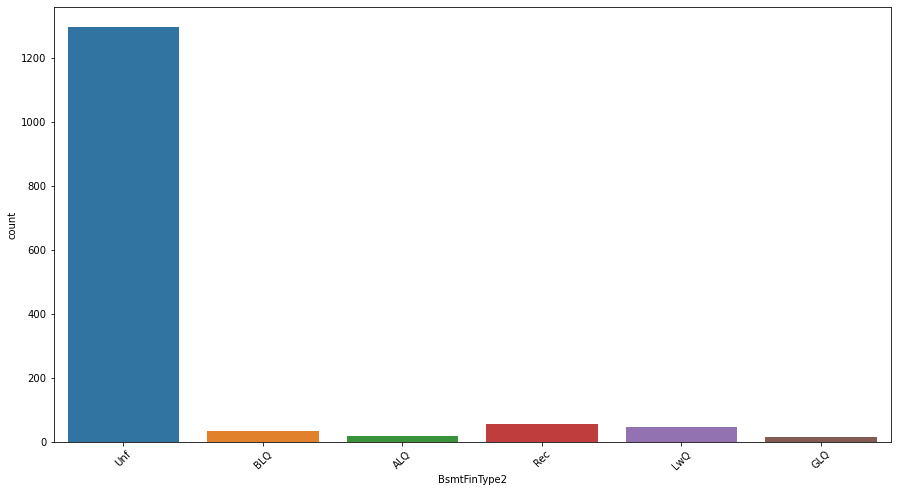

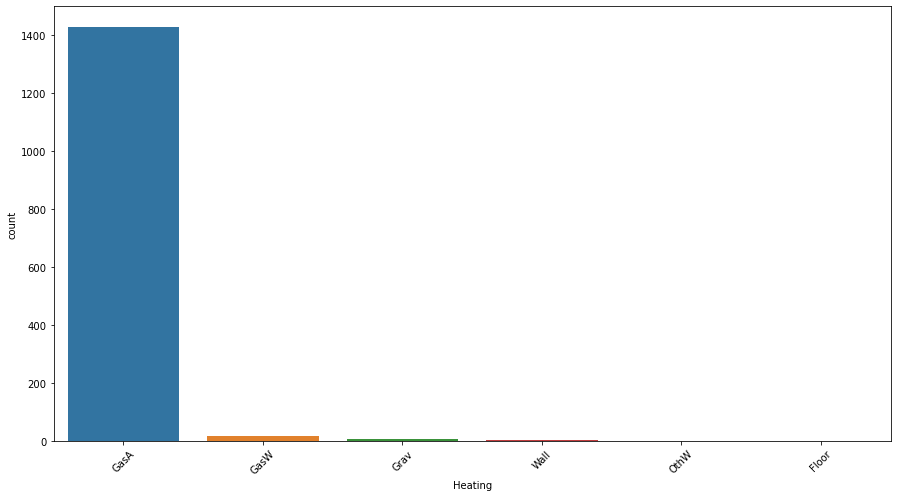

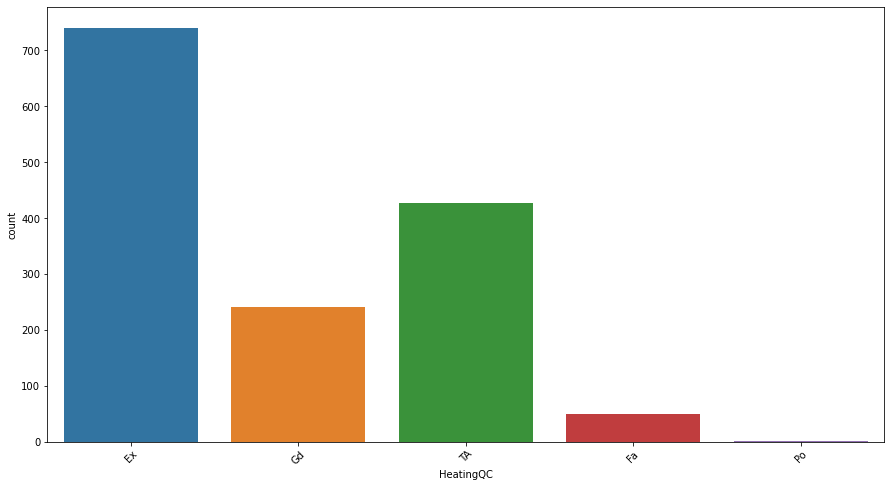

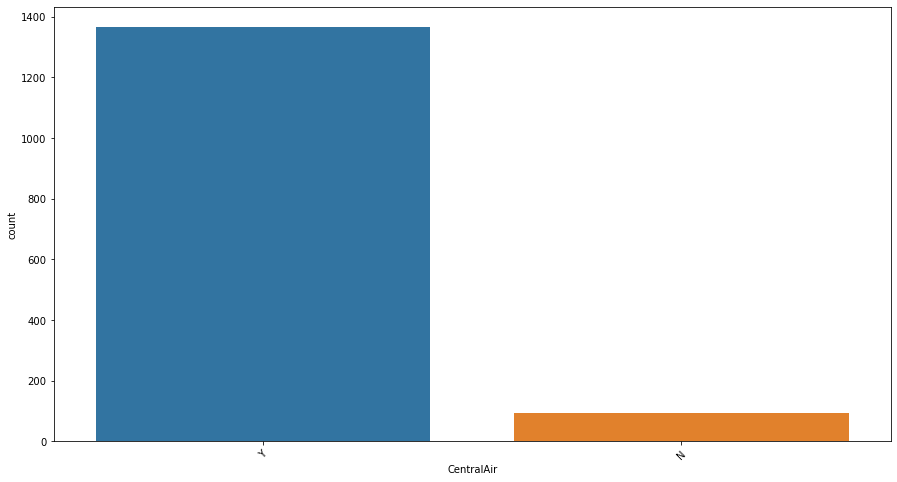

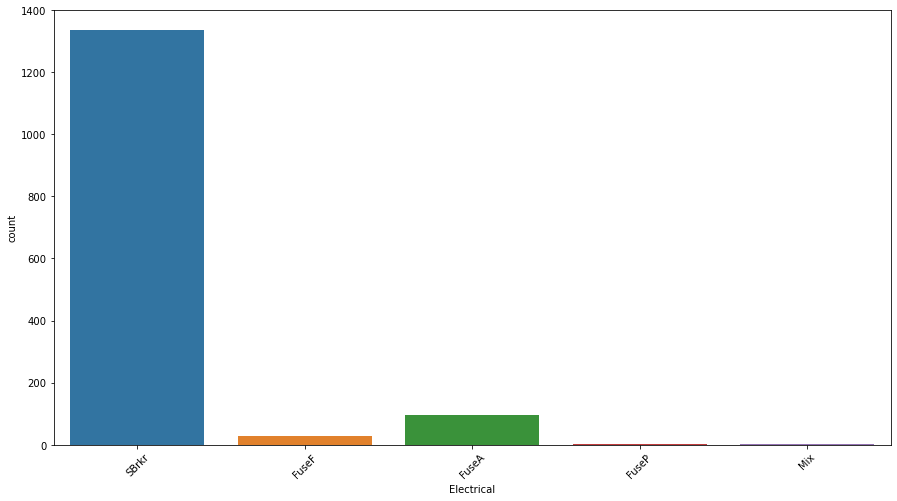

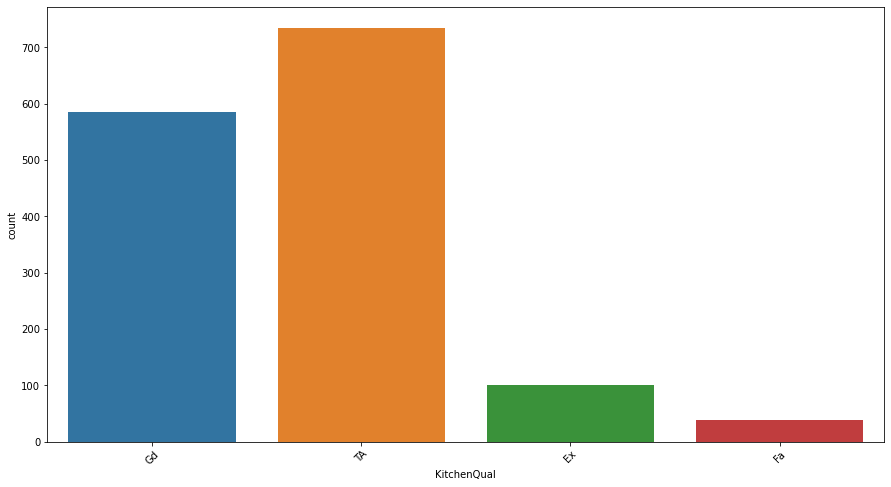

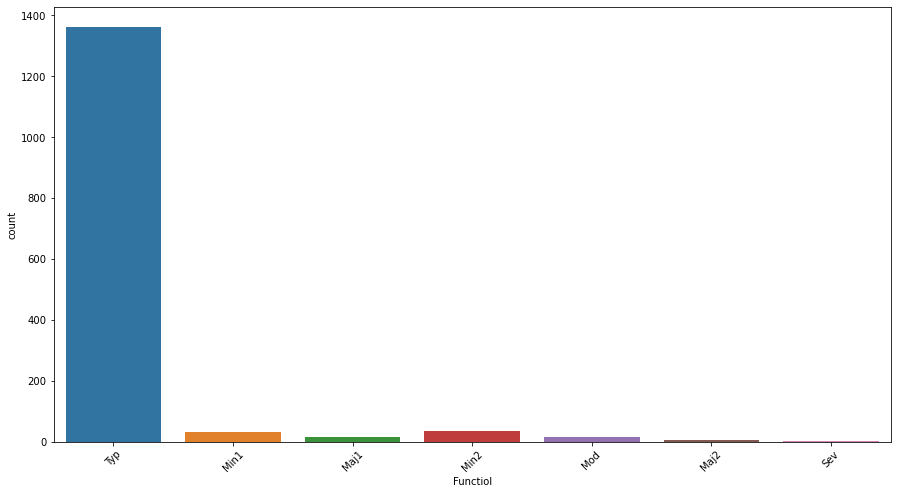

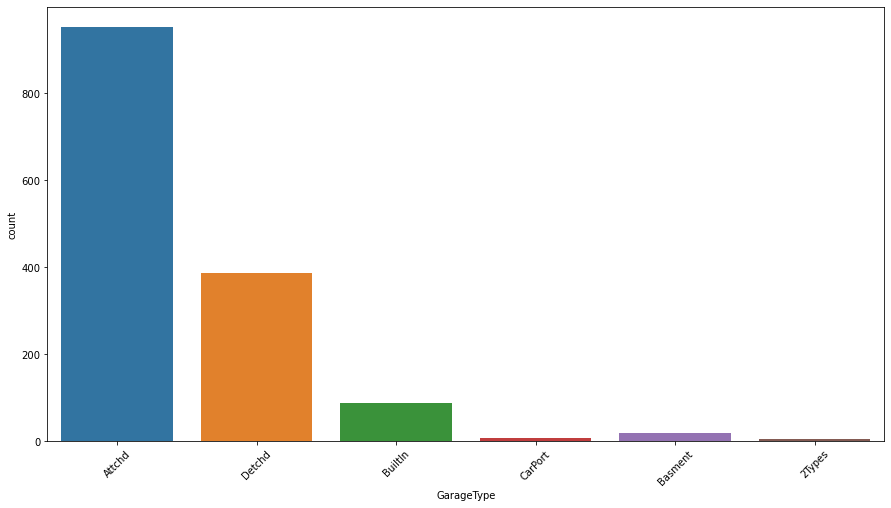

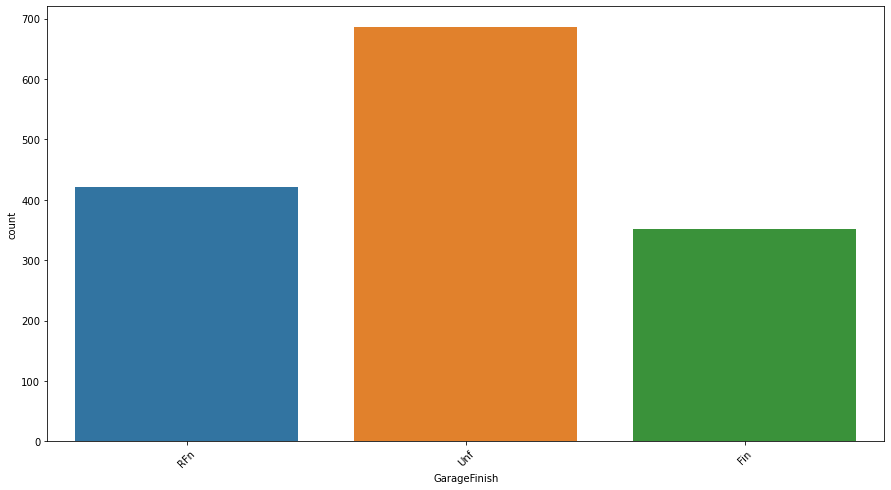

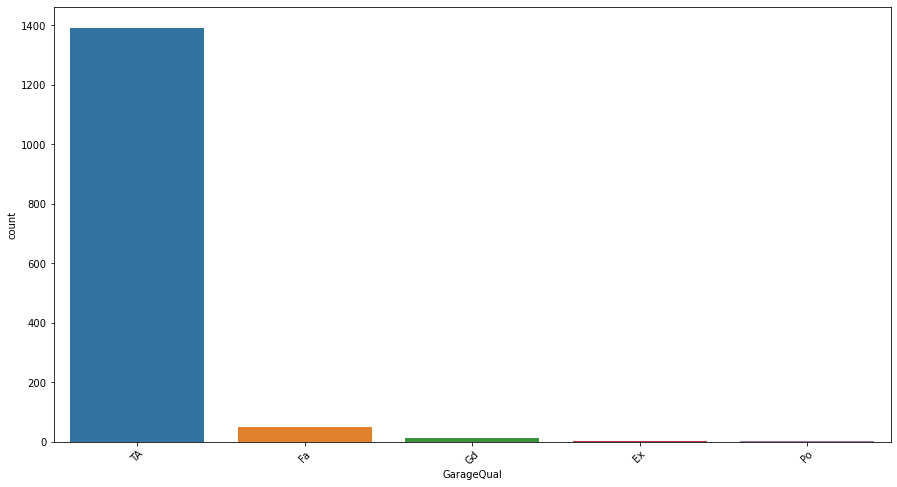

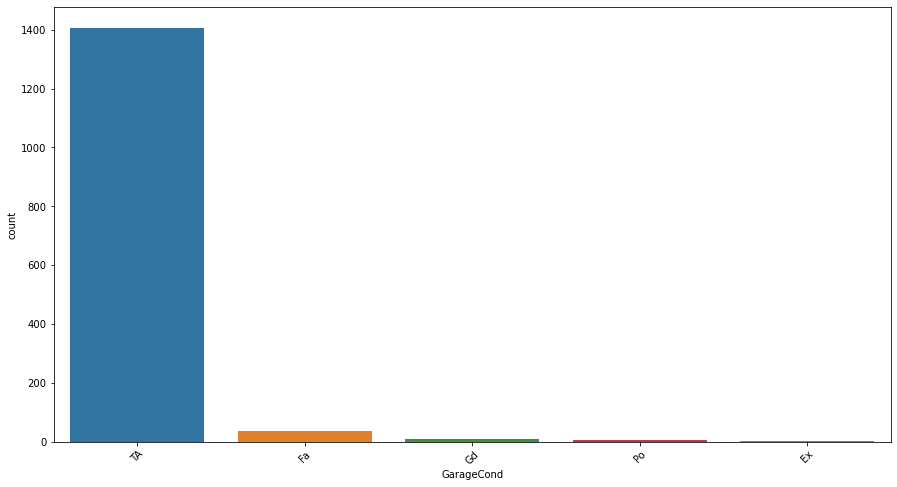

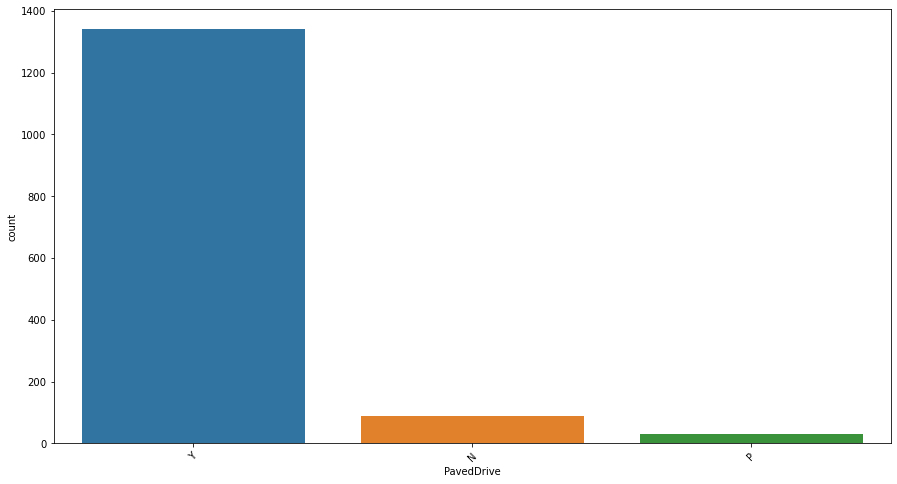

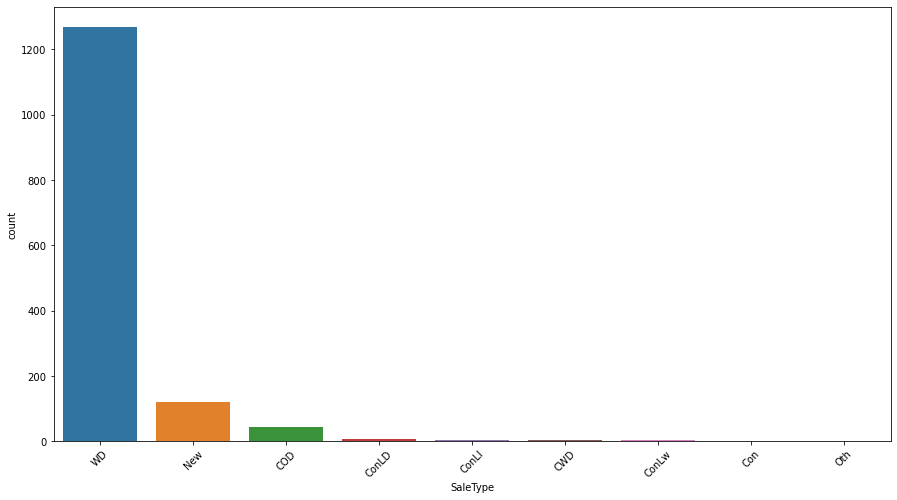

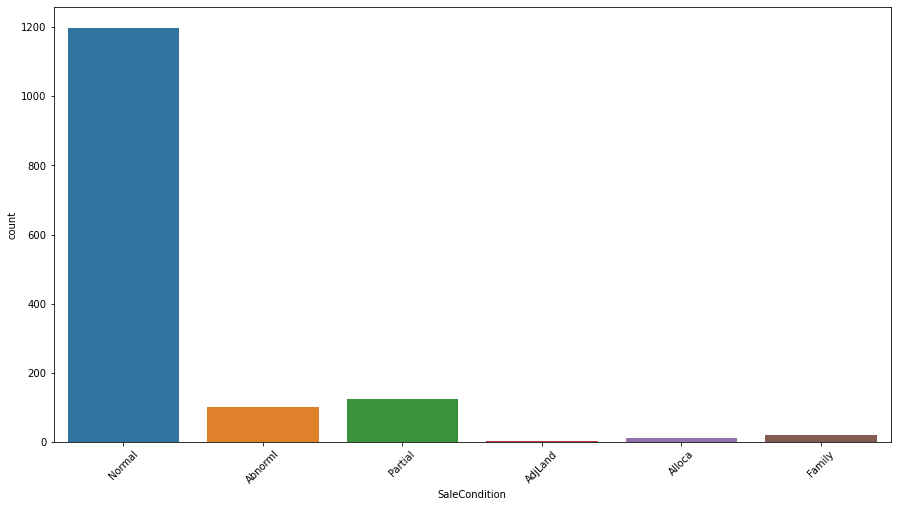

In [96]:
for cols in categorical_df.columns:
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=45)
    sns.countplot(x=cols,data=categorical_df)

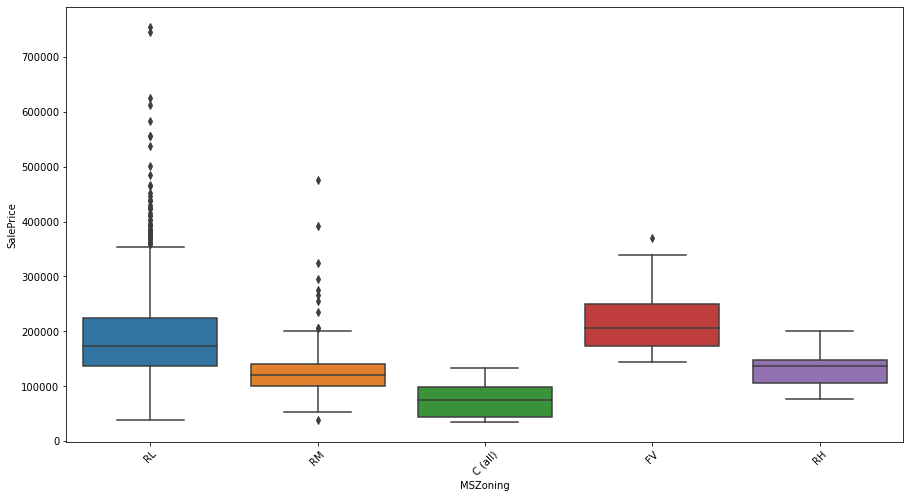

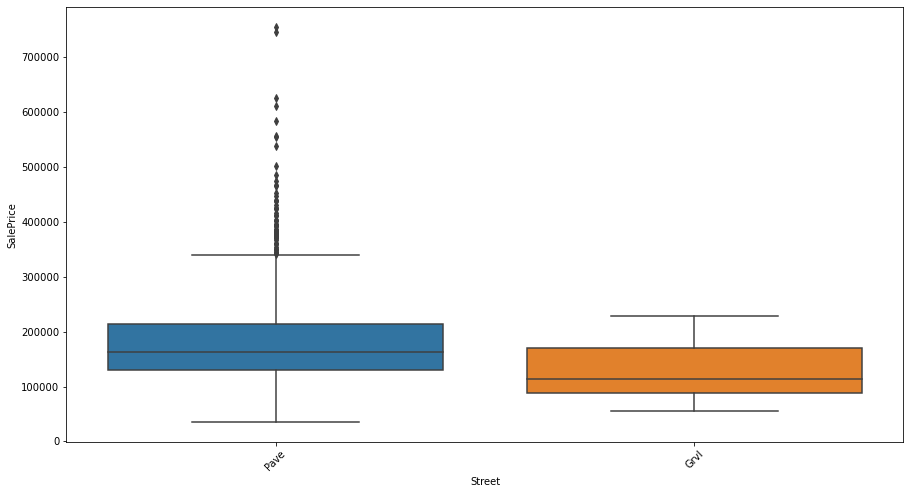

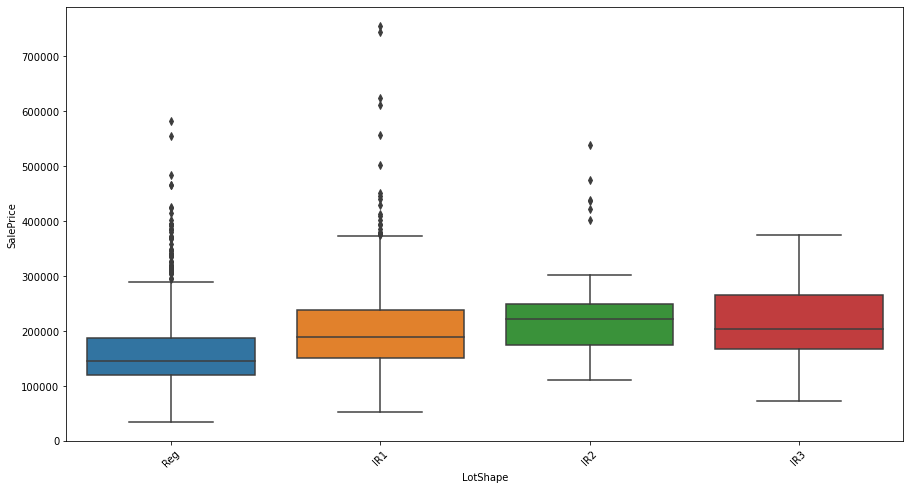

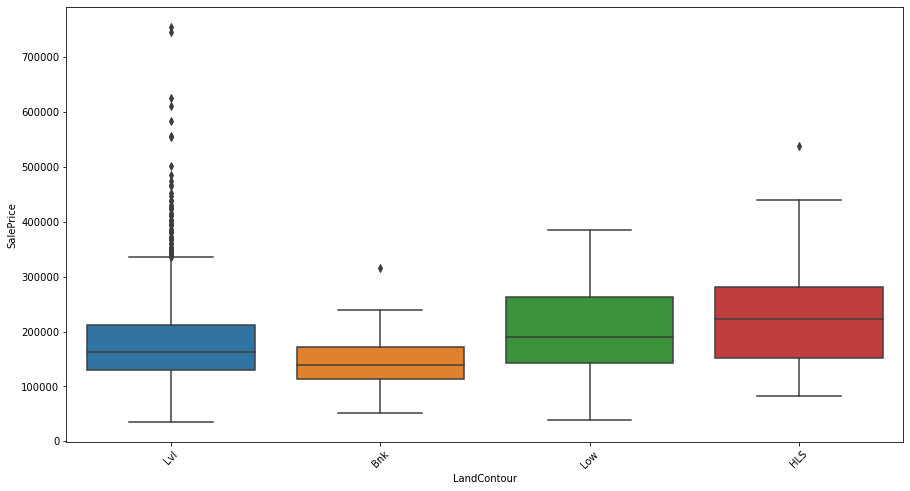

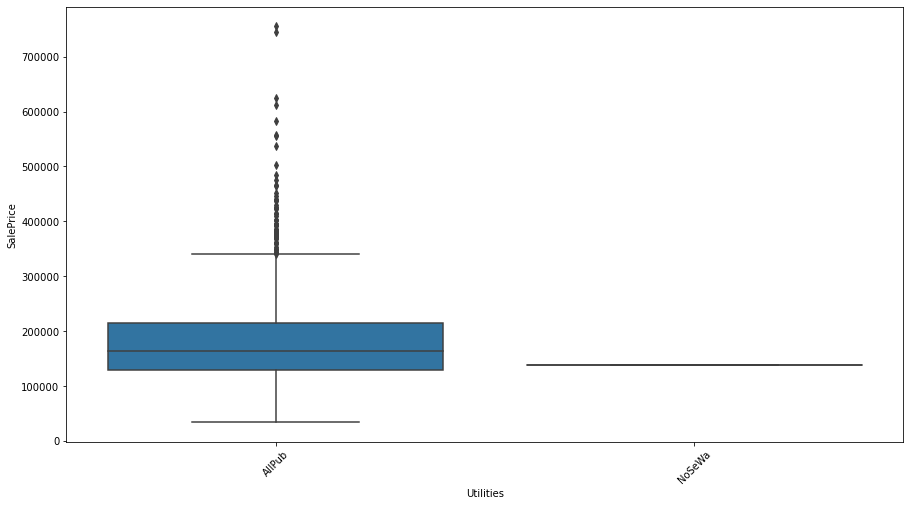

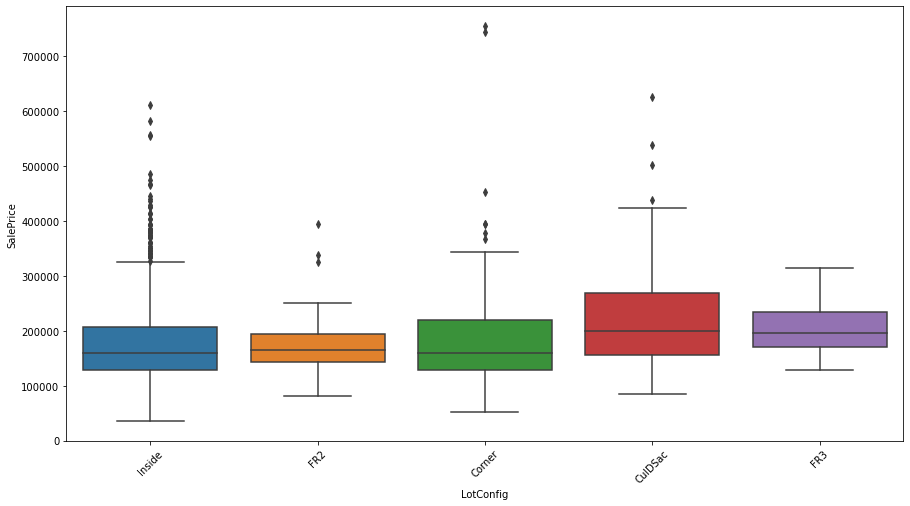

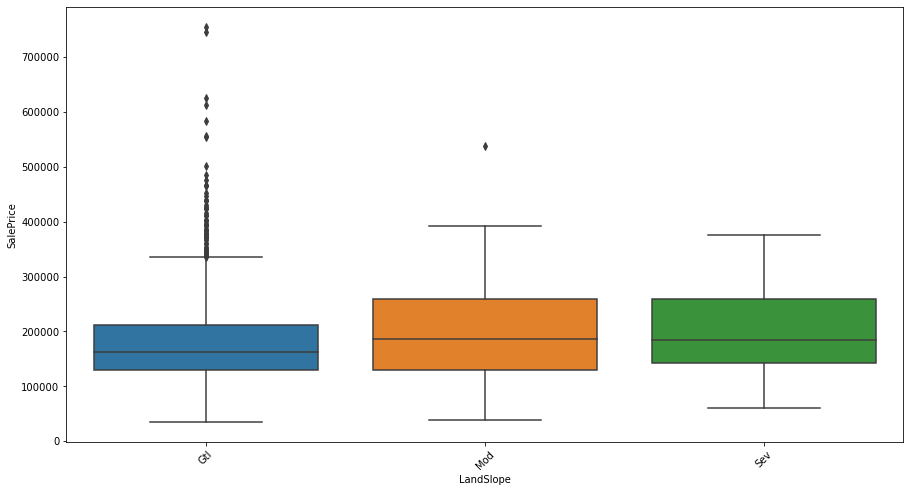

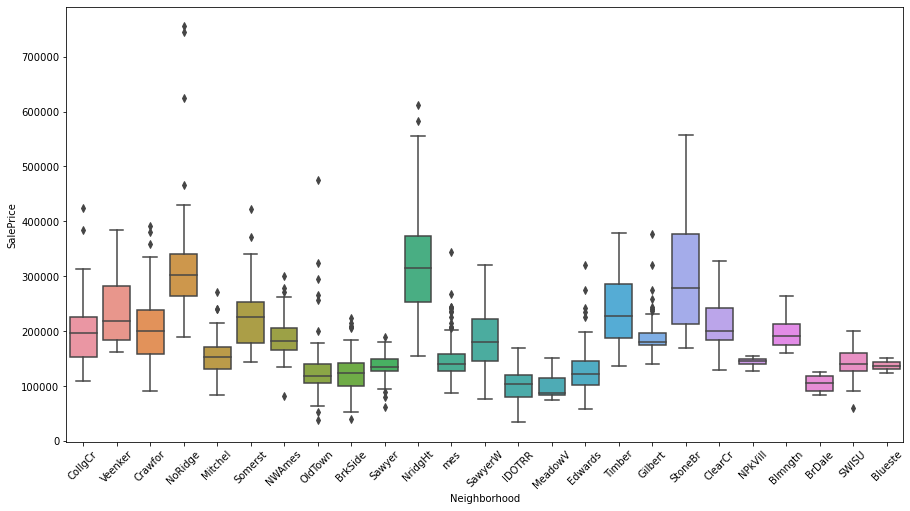

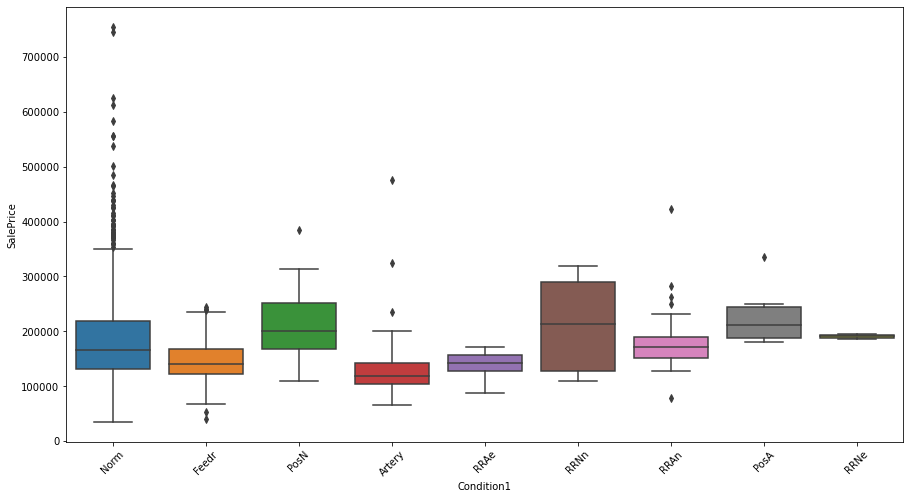

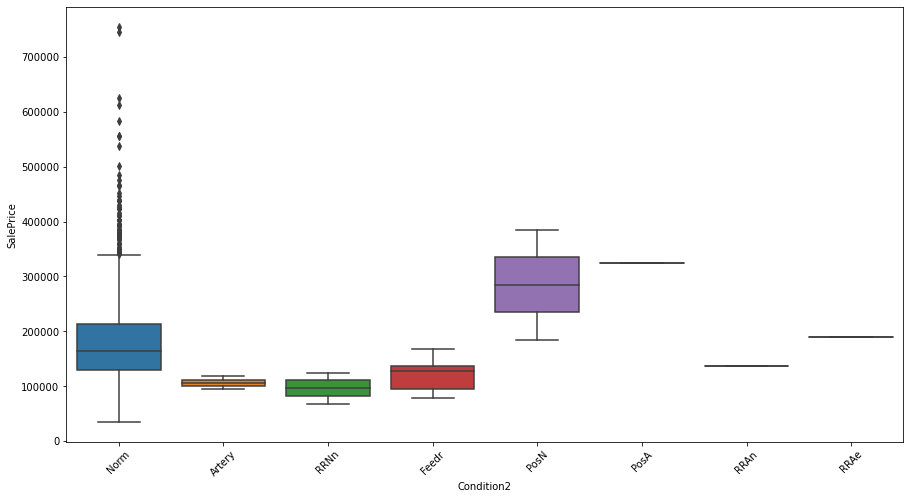

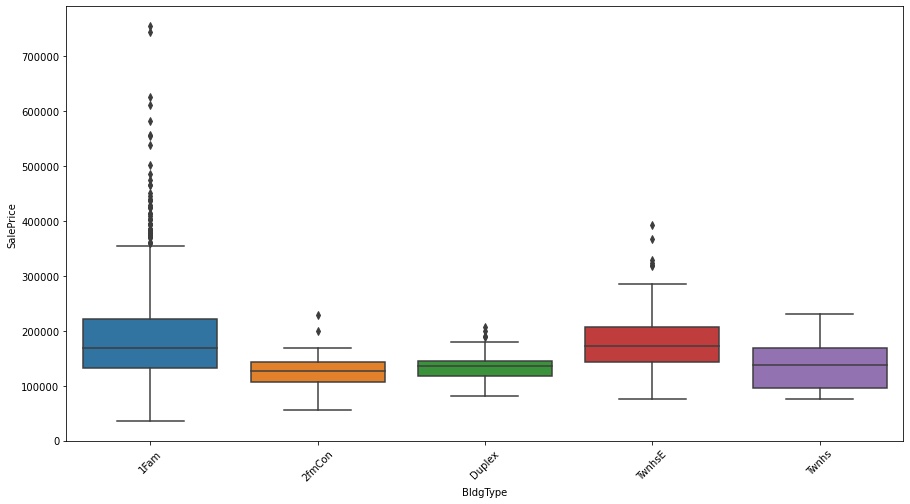

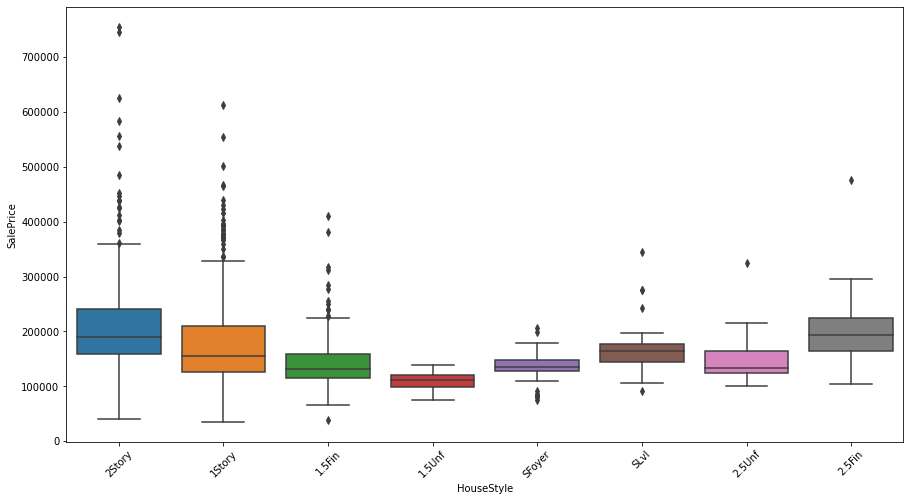

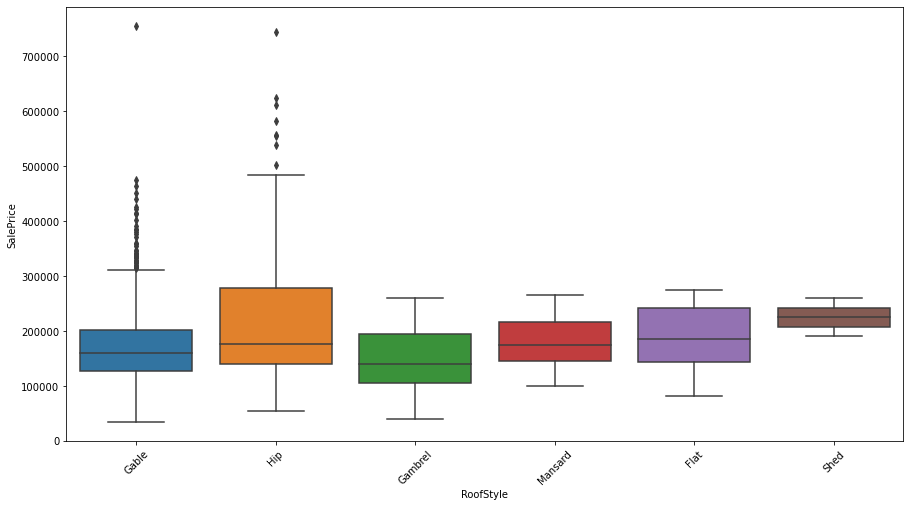

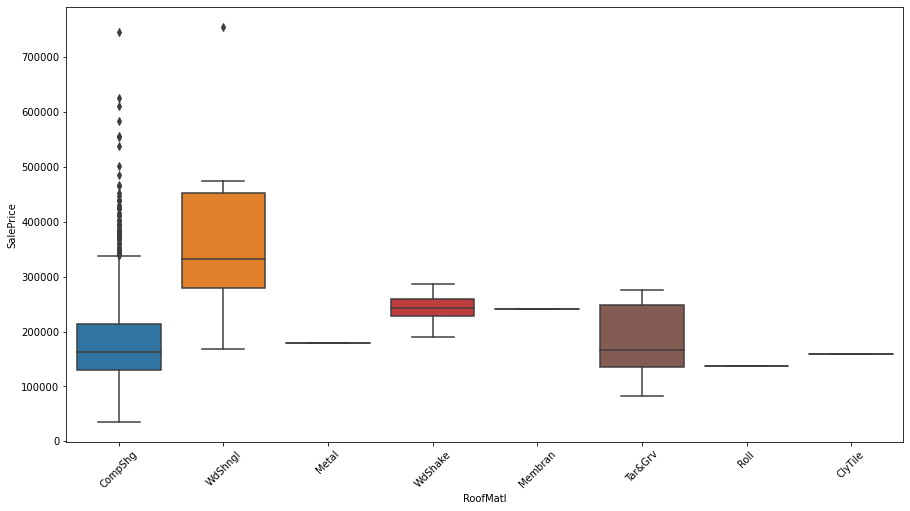

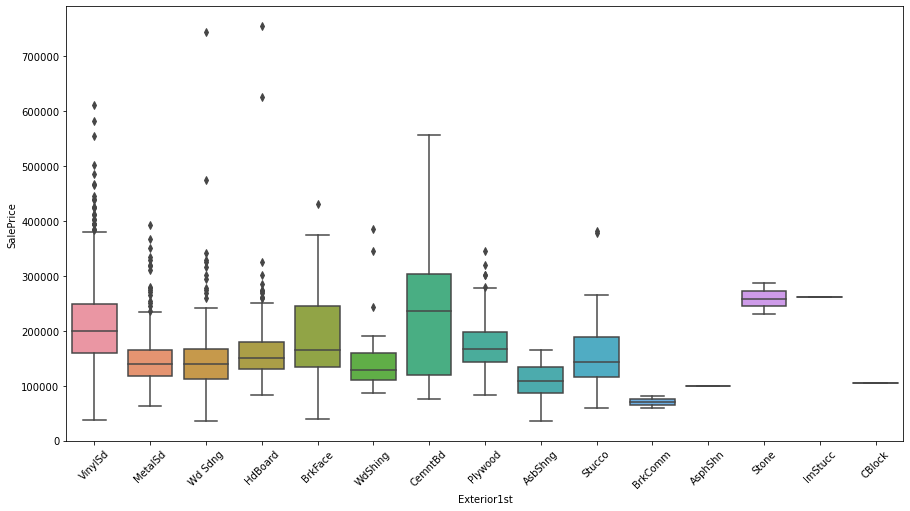

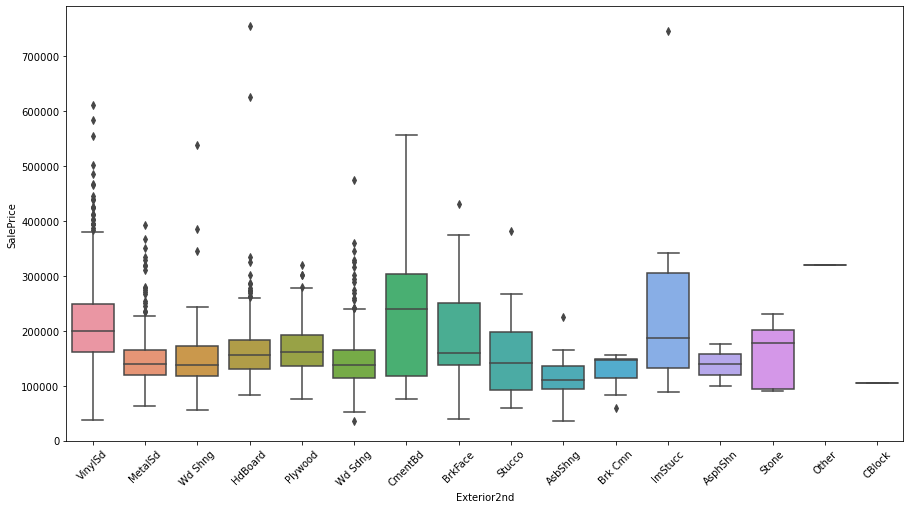

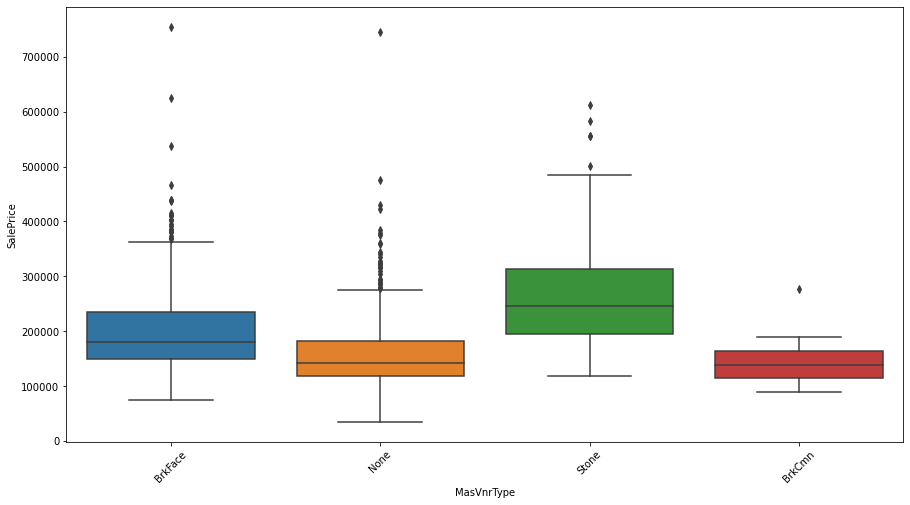

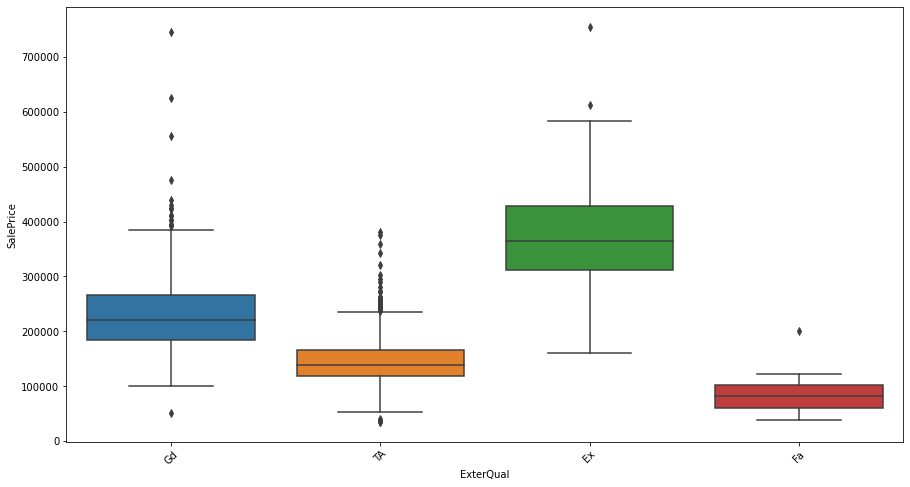

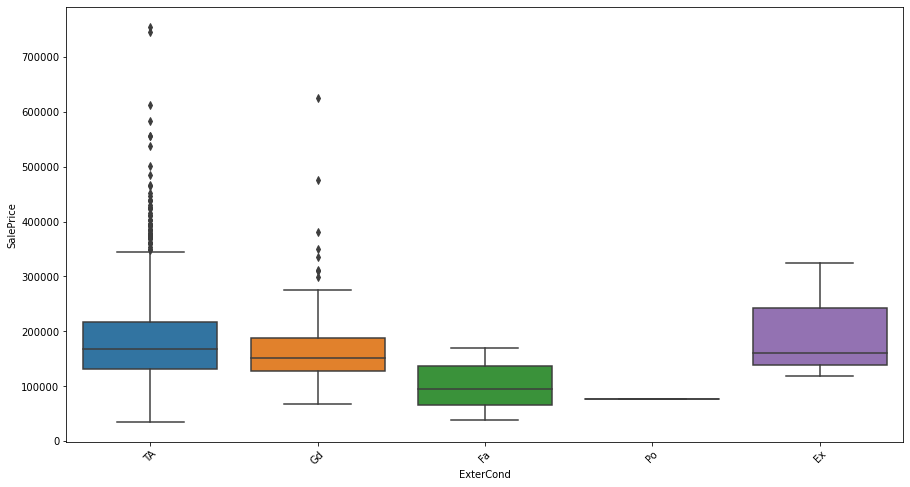

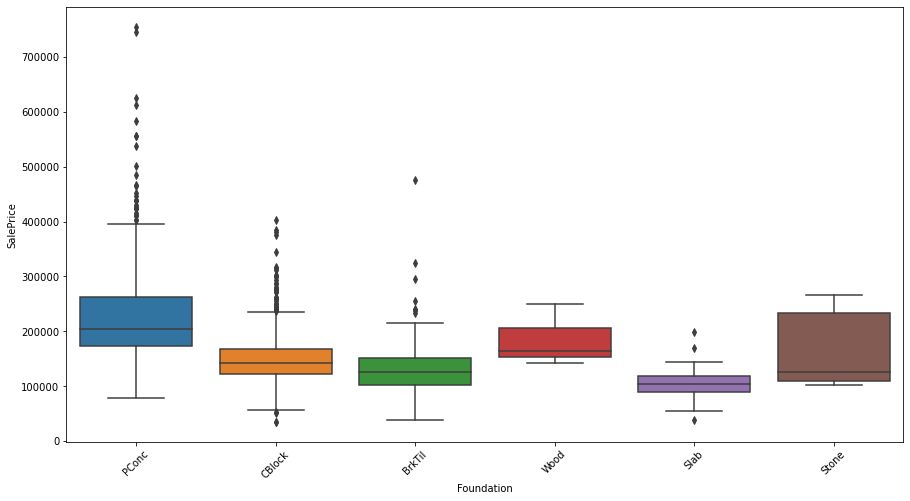

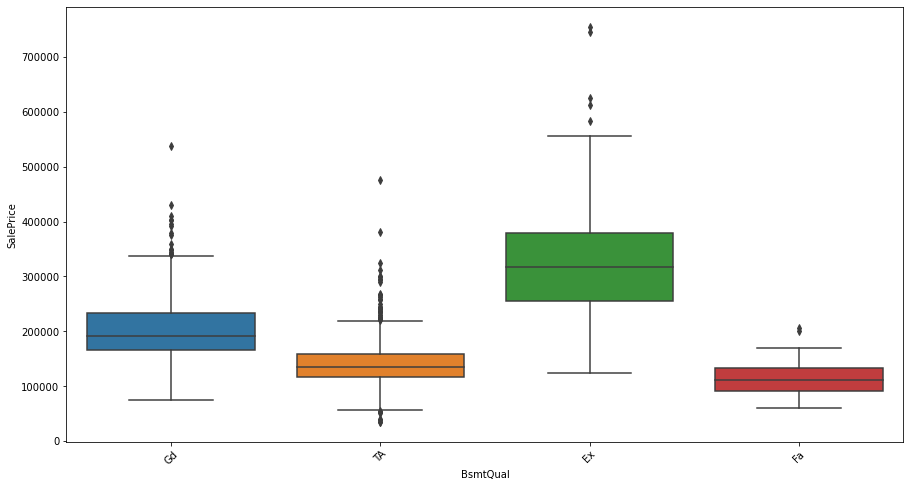

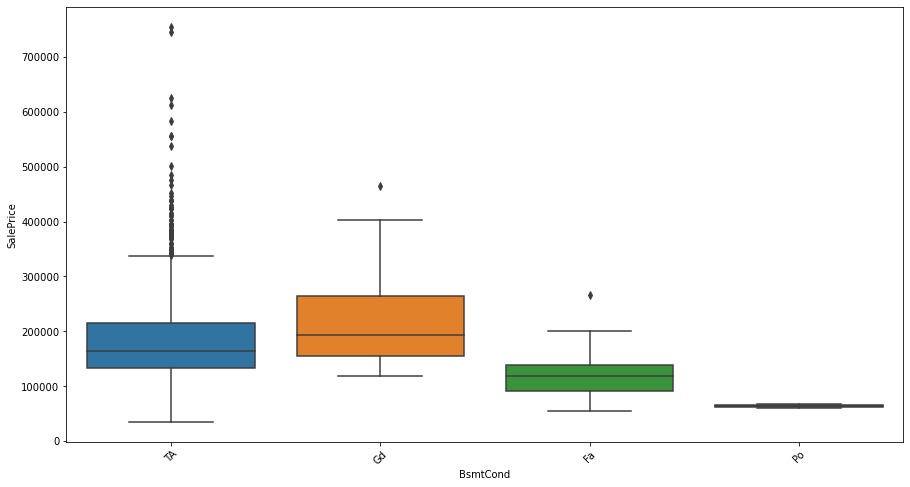

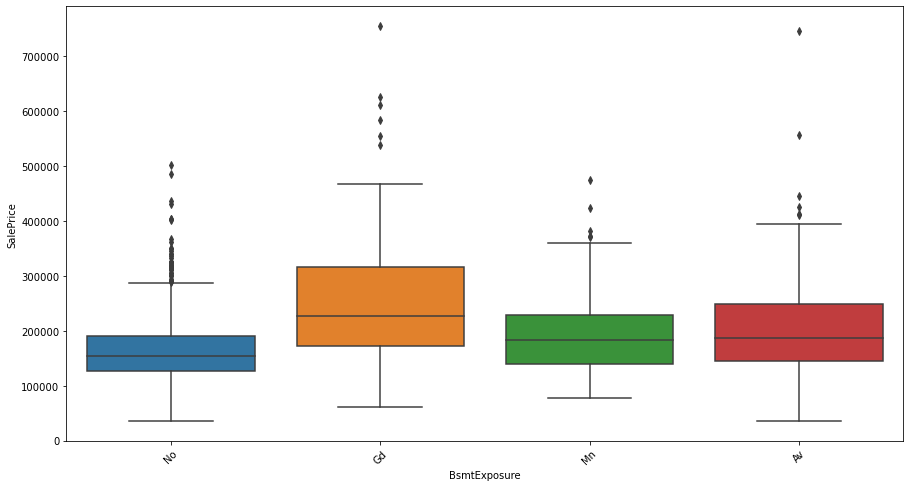

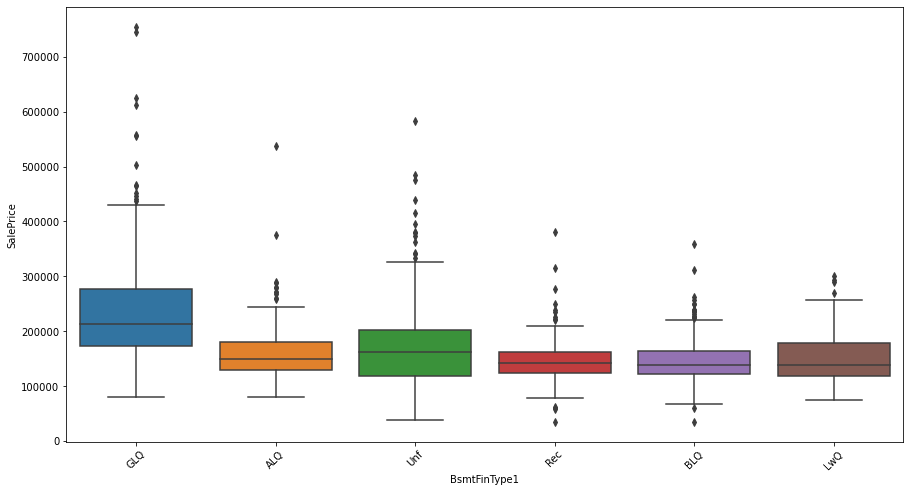

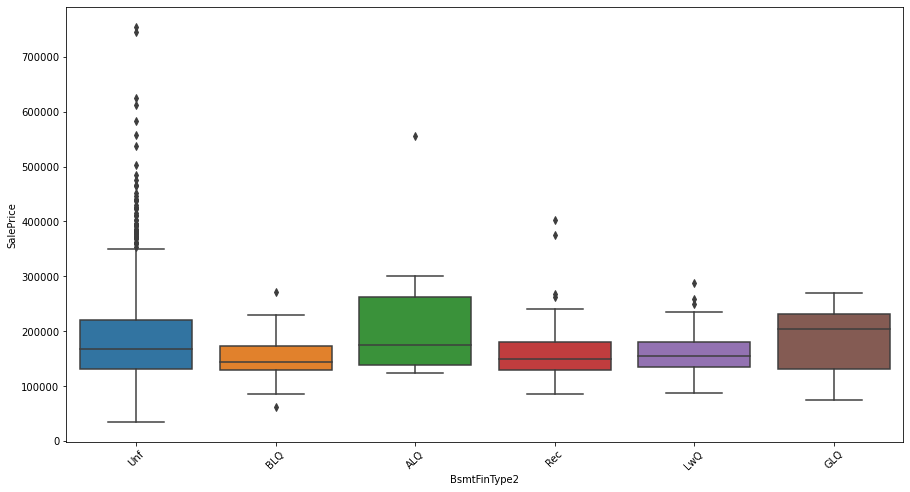

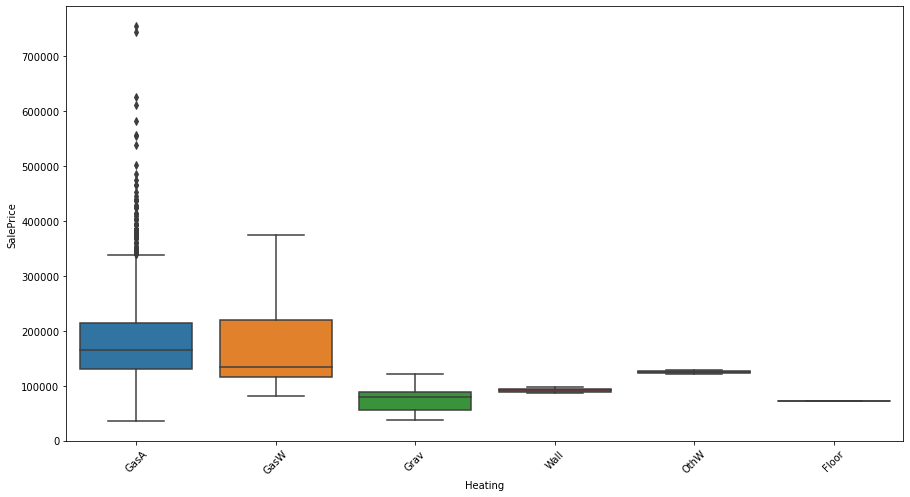

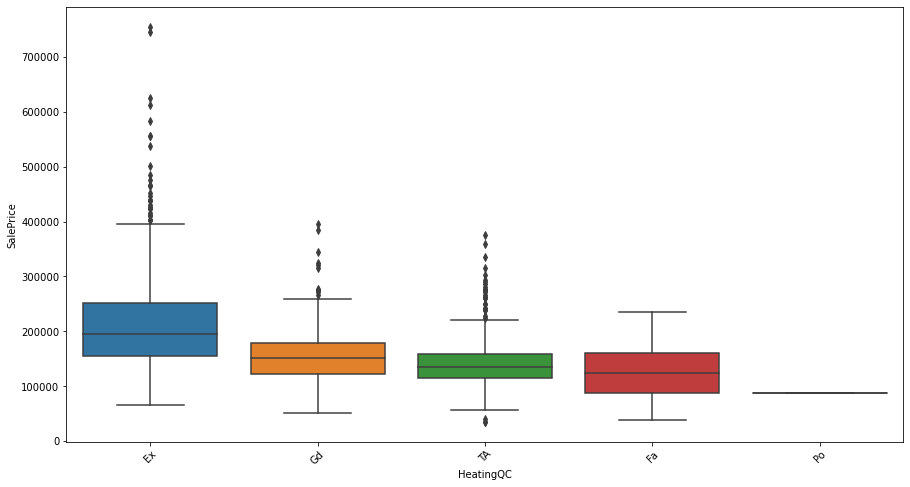

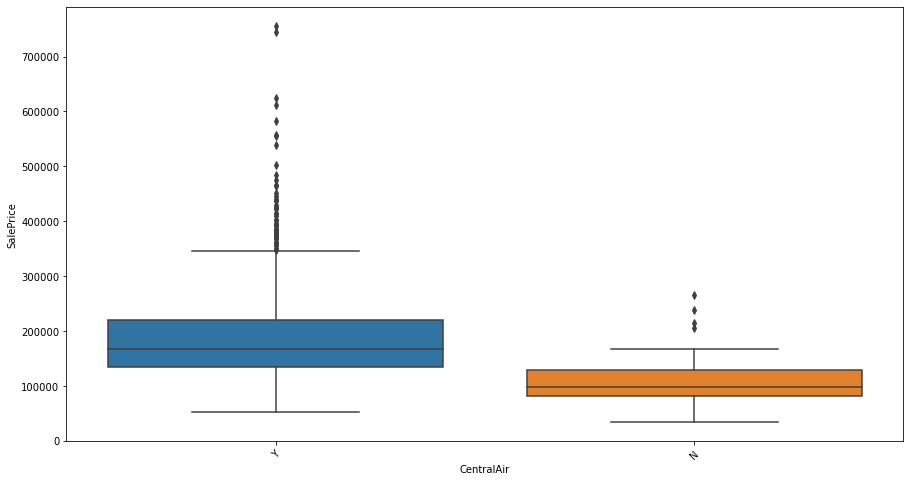

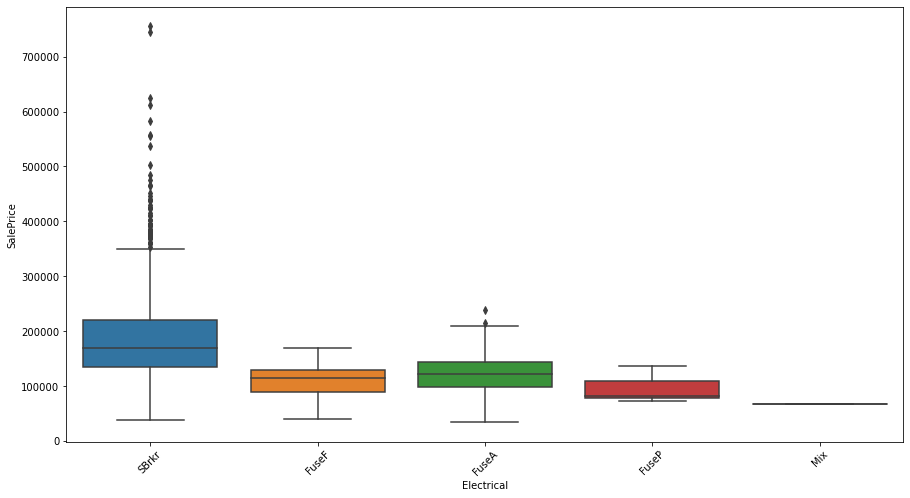

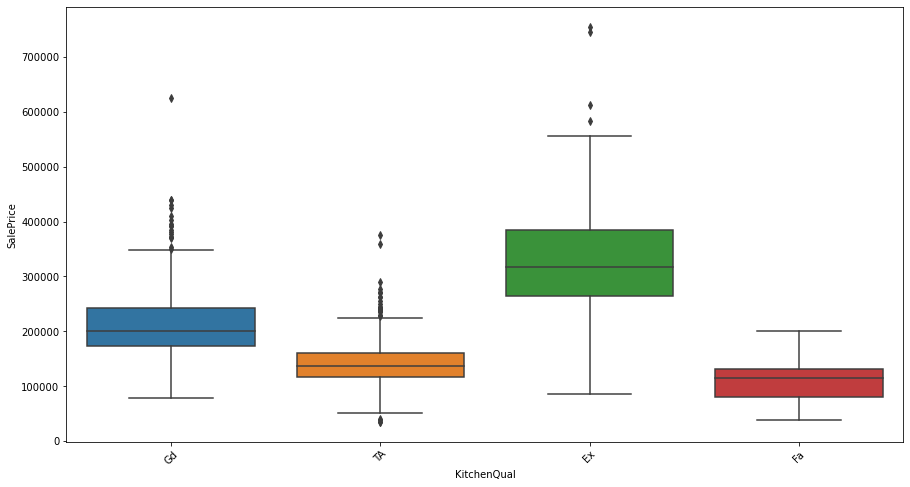

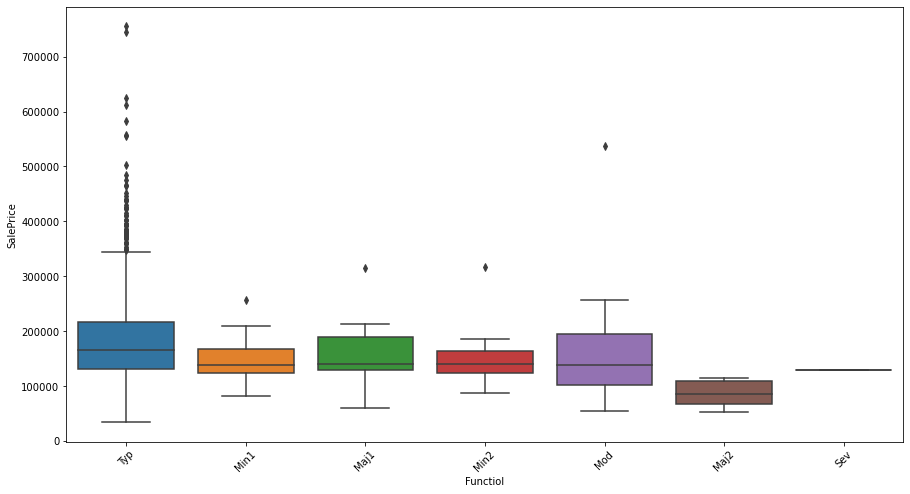

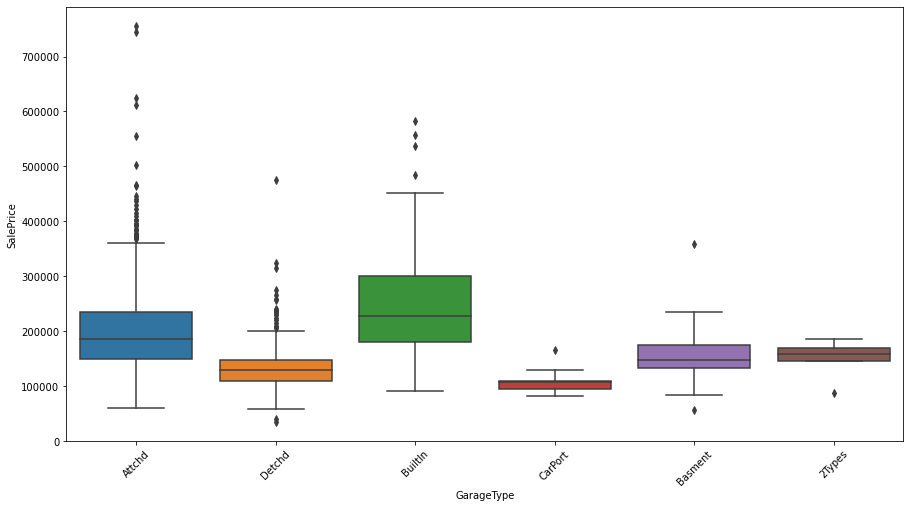

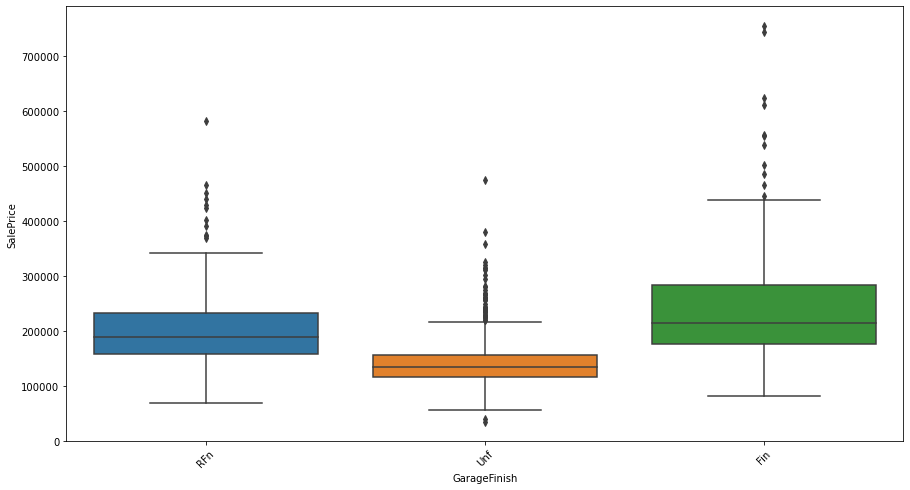

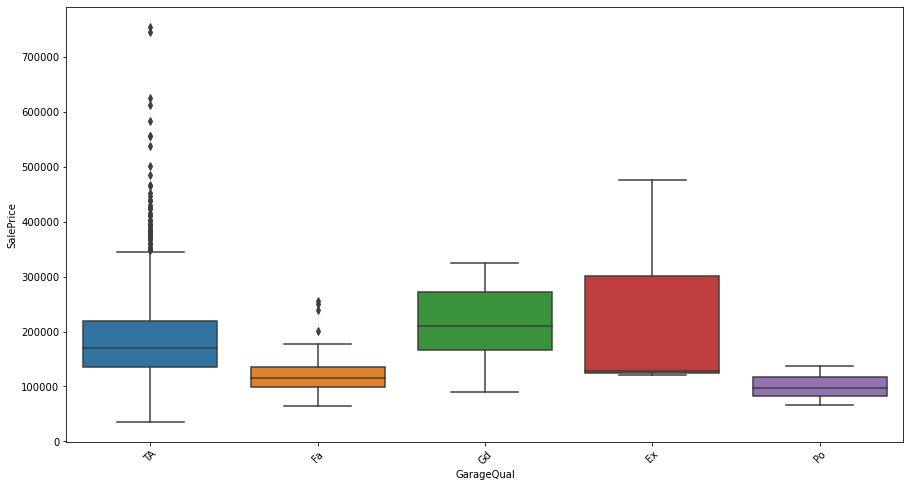

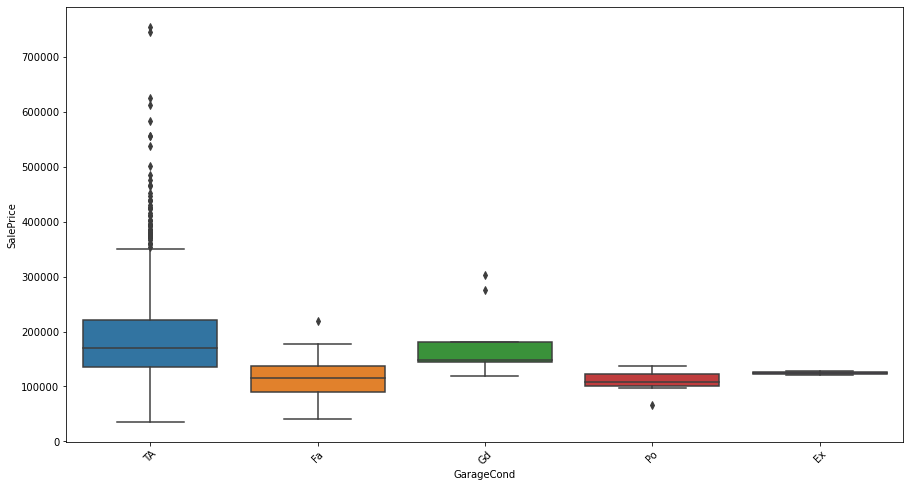

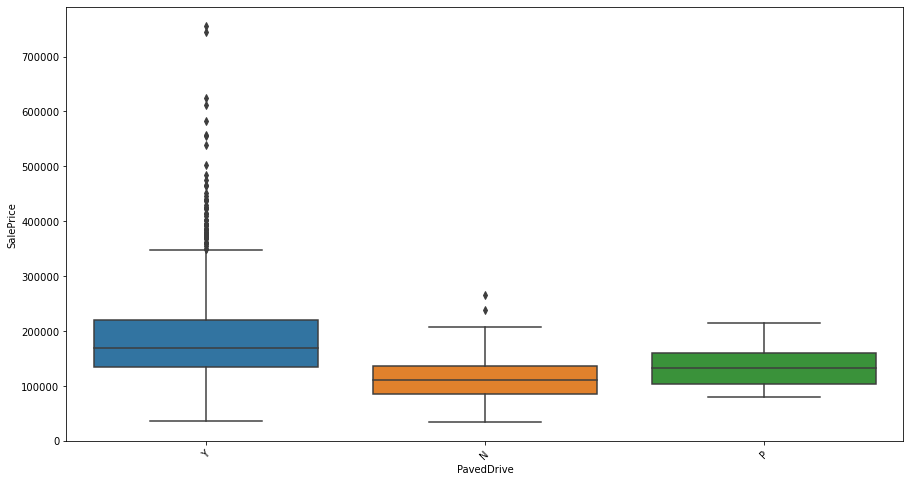

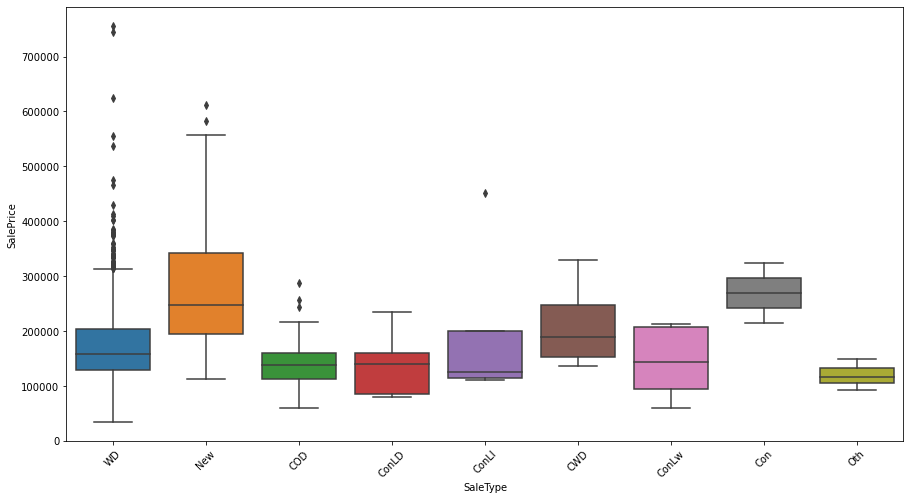

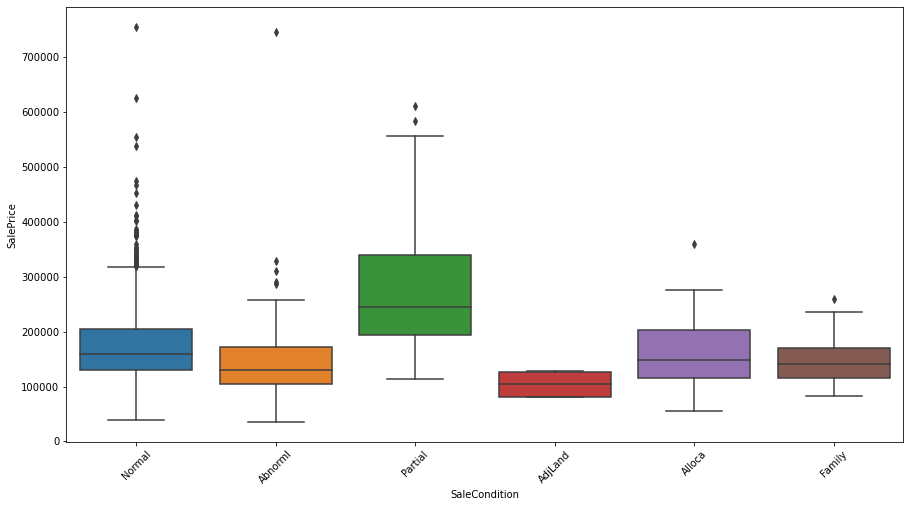

In [98]:
for cols in categorical_df.columns:
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=45)
    sns.boxplot(cols,'SalePrice',data=df)

#### c.	Identify significant variables using p-values and Chi-Square values

In [105]:
import scipy
from scipy.stats import chi2 

In [118]:
imp_cols = []
for cols in categorical_df.columns:
    ct_table = pd.crosstab(df[cols],df['SalePrice'])
    #print(ct_table)
    chi2_stat, p,dof,expected = scipy.stats.chi2_contingency(ct_table)
    print('-'*50)
    print('Column name :- ', cols)
    print(f"chi2 statistic:     {chi2_stat:.5g}")
    print(f"p-value:            {p:.5g}")
    print(f"degrees of freedom: {dof}")
    print("expected frequencies:\n",expected)
    if (p>0.05):
        imp_cols.append(cols)
    print('*'*50)

--------------------------------------------------
Column name :-  MSZoning
chi2 statistic:     3147.9
p-value:            4.3483e-11
degrees of freedom: 2648
expected frequencies:
 [[0.00684932 0.00684932 0.00684932 ... 0.00684932 0.00684932 0.00684932]
 [0.04452055 0.04452055 0.04452055 ... 0.04452055 0.04452055 0.04452055]
 [0.0109589  0.0109589  0.0109589  ... 0.0109589  0.0109589  0.0109589 ]
 [0.78835616 0.78835616 0.78835616 ... 0.78835616 0.78835616 0.78835616]
 [0.14931507 0.14931507 0.14931507 ... 0.14931507 0.14931507 0.14931507]]
**************************************************
--------------------------------------------------
Column name :-  Street
chi2 statistic:     888.31
p-value:            8.3389e-09
degrees of freedom: 662
expected frequencies:
 [[0.00410959 0.00410959 0.00410959 ... 0.00410959 0.00410959 0.00410959]
 [0.99589041 0.99589041 0.99589041 ... 0.99589041 0.99589041 0.99589041]]
**************************************************
------------------------

--------------------------------------------------
Column name :-  Exterior1st
chi2 statistic:     8712.7
p-value:            0.99998
degrees of freedom: 9268
expected frequencies:
 [[0.01369863 0.01369863 0.01369863 ... 0.01369863 0.01369863 0.01369863]
 [0.00068493 0.00068493 0.00068493 ... 0.00068493 0.00068493 0.00068493]
 [0.00136986 0.00136986 0.00136986 ... 0.00136986 0.00136986 0.00136986]
 ...
 [0.35273973 0.35273973 0.35273973 ... 0.35273973 0.35273973 0.35273973]
 [0.14109589 0.14109589 0.14109589 ... 0.14109589 0.14109589 0.14109589]
 [0.01780822 0.01780822 0.01780822 ... 0.01780822 0.01780822 0.01780822]]
**************************************************
--------------------------------------------------
Column name :-  Exterior2nd
chi2 statistic:     9785.8
p-value:            0.84692
degrees of freedom: 9930
expected frequencies:
 [[0.01369863 0.01369863 0.01369863 ... 0.01369863 0.01369863 0.01369863]
 [0.00205479 0.00205479 0.00205479 ... 0.00205479 0.00205479 0.00205

--------------------------------------------------
Column name :-  KitchenQual
chi2 statistic:     2811.8
p-value:            1.2821e-31
degrees of freedom: 1986
expected frequencies:
 [[0.06849315 0.06849315 0.06849315 ... 0.06849315 0.06849315 0.06849315]
 [0.02671233 0.02671233 0.02671233 ... 0.02671233 0.02671233 0.02671233]
 [0.40136986 0.40136986 0.40136986 ... 0.40136986 0.40136986 0.40136986]
 [0.50342466 0.50342466 0.50342466 ... 0.50342466 0.50342466 0.50342466]]
**************************************************
--------------------------------------------------
Column name :-  Functiol
chi2 statistic:     3073.9
p-value:            1
degrees of freedom: 3972
expected frequencies:
 [[9.58904110e-03 9.58904110e-03 9.58904110e-03 ... 9.58904110e-03
  9.58904110e-03 9.58904110e-03]
 [3.42465753e-03 3.42465753e-03 3.42465753e-03 ... 3.42465753e-03
  3.42465753e-03 3.42465753e-03]
 [2.12328767e-02 2.12328767e-02 2.12328767e-02 ... 2.12328767e-02
  2.12328767e-02 2.12328767e-02]
 

In [119]:
imp_cols

['LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'Functiol',
 'GarageType',
 'GarageCond',
 'PavedDrive']

### 5.	Combine all the significant categorical and numerical variables

In [120]:
# for Numerical
selected_df

# for Categorical
imp_categorical_df = df[imp_cols]

In [121]:
imp_categorical_df

,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,Functiol,GarageType,GarageCond,PavedDrive
0,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,GLQ,Unf,Ex,SBrkr,Typ,Attchd,TA,Y
1,Lvl,AllPub,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,ALQ,Unf,Ex,SBrkr,Typ,Attchd,TA,Y
2,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,GLQ,Unf,Ex,SBrkr,Typ,Attchd,TA,Y
3,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,ALQ,Unf,Gd,SBrkr,Typ,Detchd,TA,Y
4,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,GLQ,Unf,Ex,SBrkr,Typ,Attchd,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Unf,Unf,Ex,SBrkr,Typ,Attchd,TA,Y
1456,Lvl,AllPub,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,ALQ,Rec,TA,SBrkr,Min1,Attchd,TA,Y
1457,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,GLQ,Unf,Ex,SBrkr,Typ,Attchd,TA,Y
1458,Lvl,AllPub,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,GLQ,Rec,Gd,FuseA,Typ,Attchd,TA,Y


In [122]:
selected_df

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,856,2,2003
1,181500,6,1262,2,1262,2,1976
2,223500,7,1786,2,920,2,2001
3,140000,7,1717,3,756,1,1915
4,250000,8,2198,3,1145,2,2000
...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,1999
1456,210000,6,2073,2,1542,2,1978
1457,266500,7,2340,1,1152,2,1941
1458,142125,5,1078,1,1078,1,1950


In [123]:
imp_df = imp_categorical_df.join(selected_df)

In [124]:
imp_df

,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,...,GarageType,GarageCond,PavedDrive,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,...,Attchd,TA,Y,208500,7,1710,2,856,2,2003
1,Lvl,AllPub,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,...,Attchd,TA,Y,181500,6,1262,2,1262,2,1976
2,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,...,Attchd,TA,Y,223500,7,1786,2,920,2,2001
3,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,...,Detchd,TA,Y,140000,7,1717,3,756,1,1915
4,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,...,Attchd,TA,Y,250000,8,2198,3,1145,2,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,...,Attchd,TA,Y,175000,6,1647,2,953,2,1999
1456,Lvl,AllPub,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,...,Attchd,TA,Y,210000,6,2073,2,1542,2,1978
1457,Lvl,AllPub,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,...,Attchd,TA,Y,266500,7,2340,1,1152,2,1941
1458,Lvl,AllPub,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,...,Attchd,TA,Y,142125,5,1078,1,1078,1,1950


### 6.	Plot box plot for the new dataset to find the variables with outliers

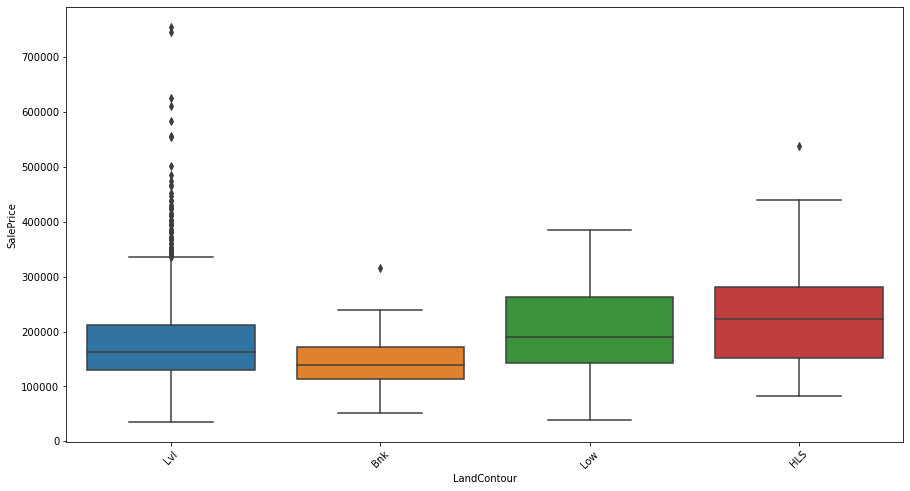

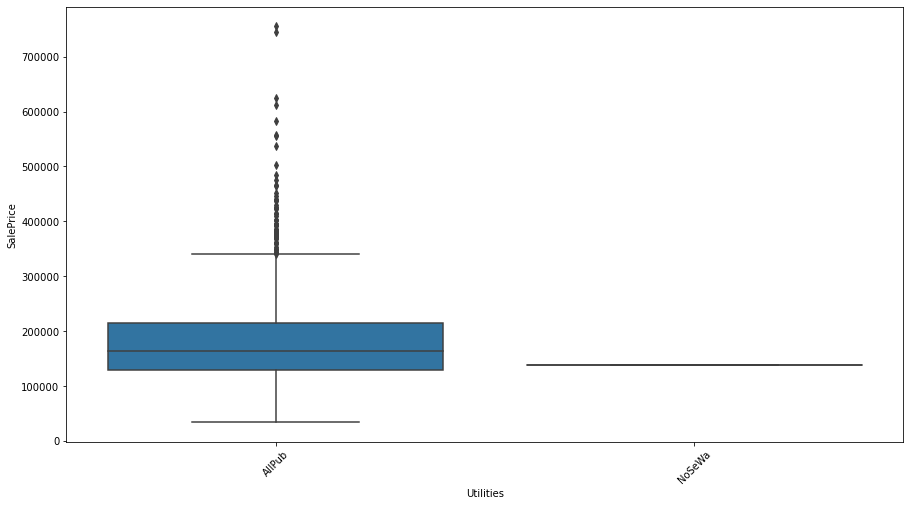

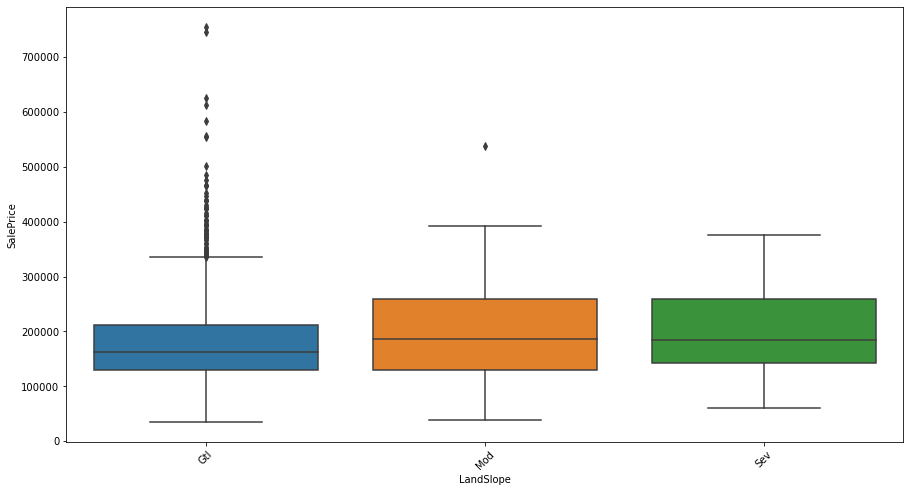

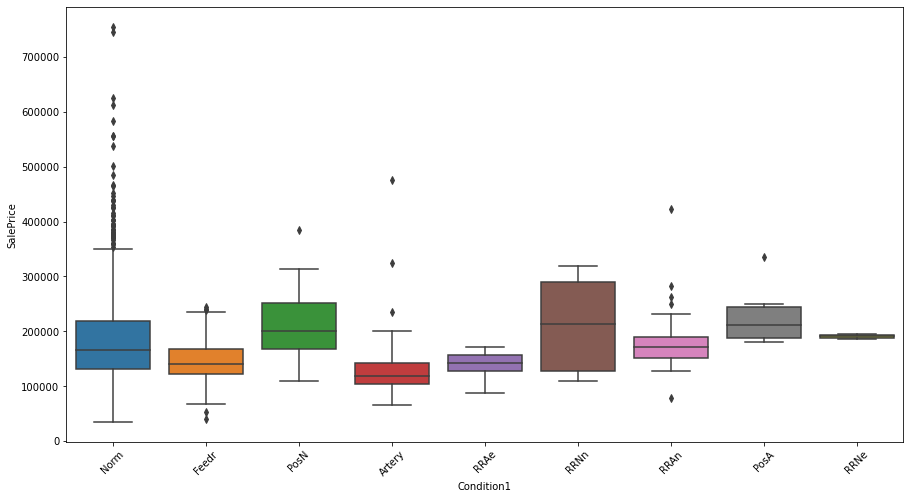

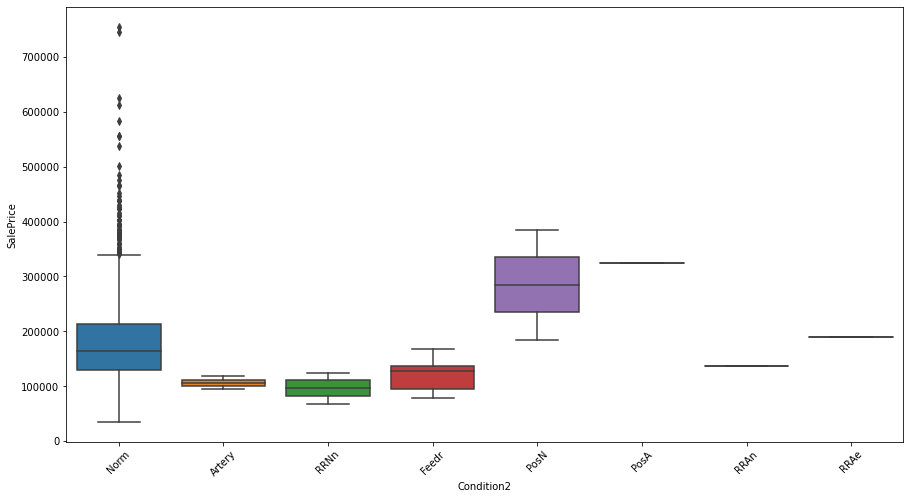

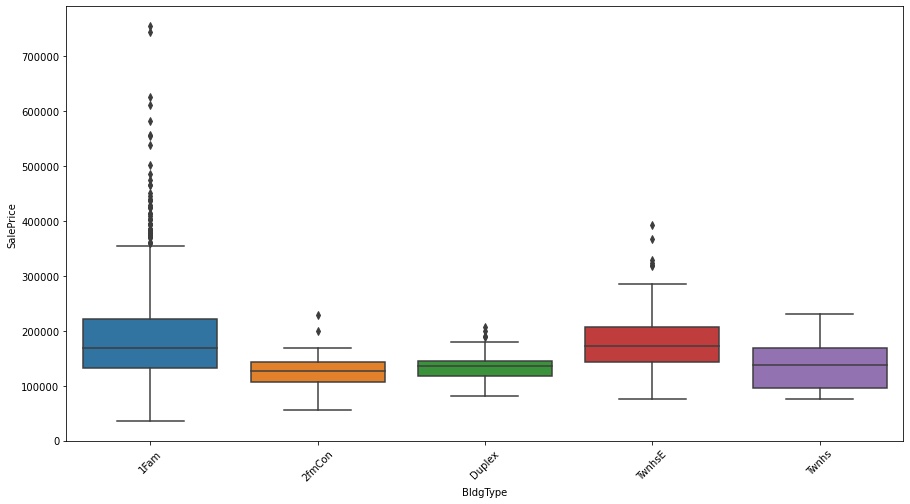

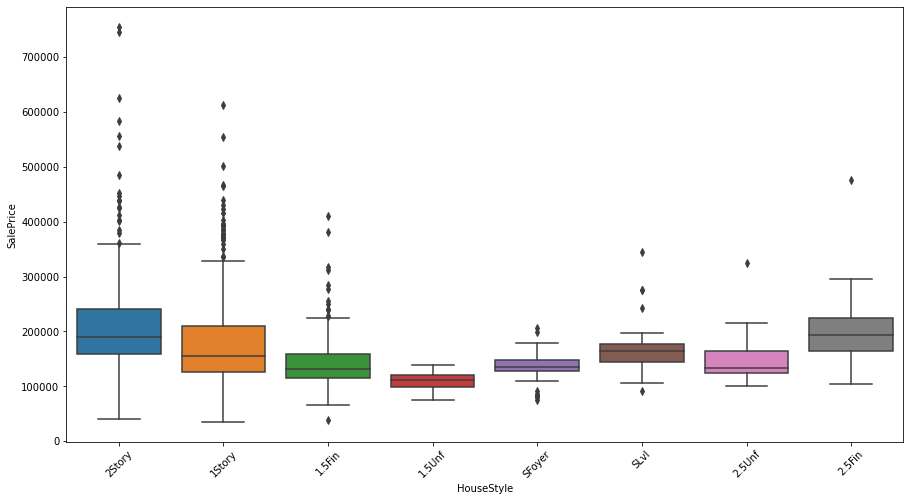

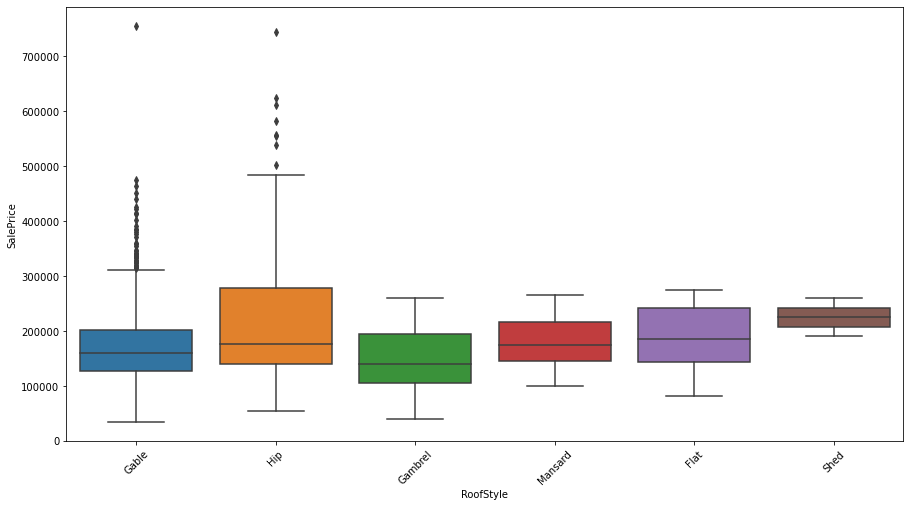

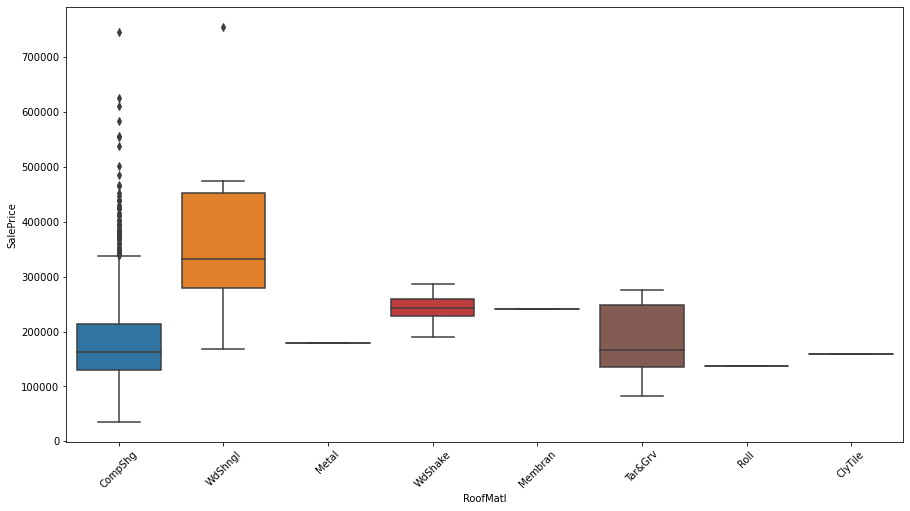

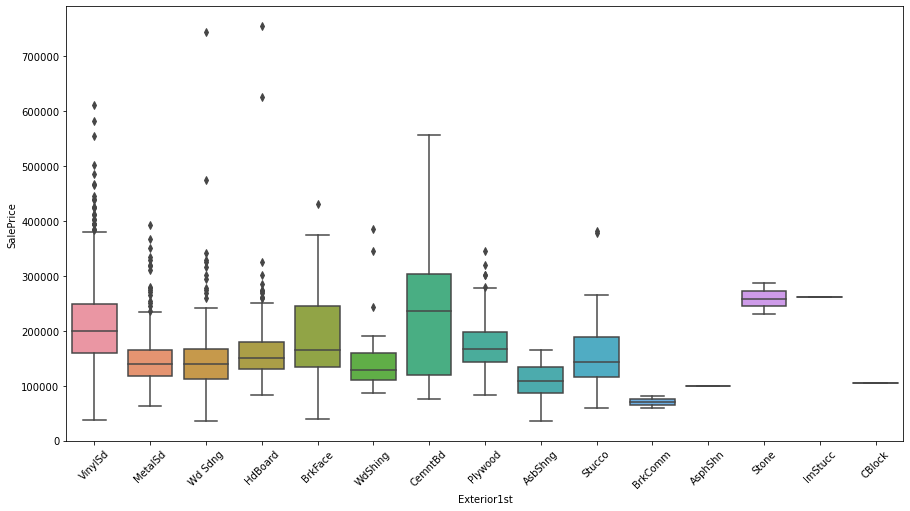

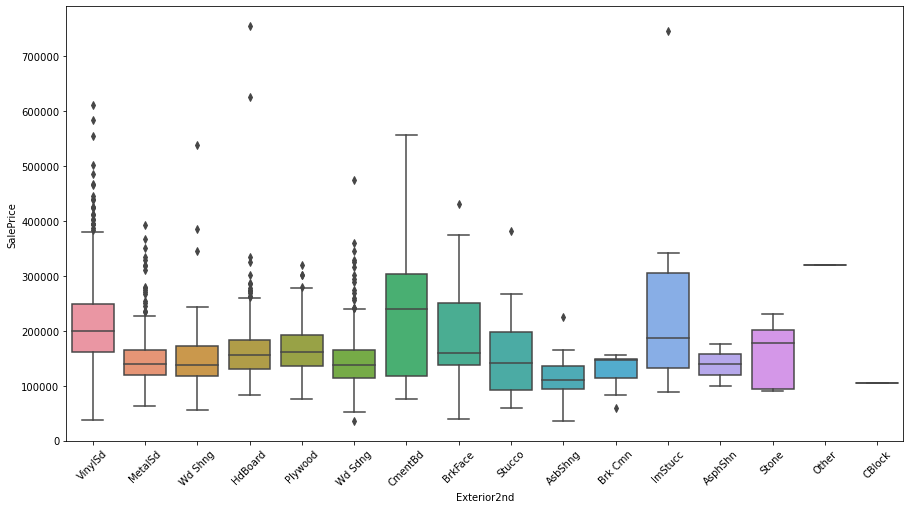

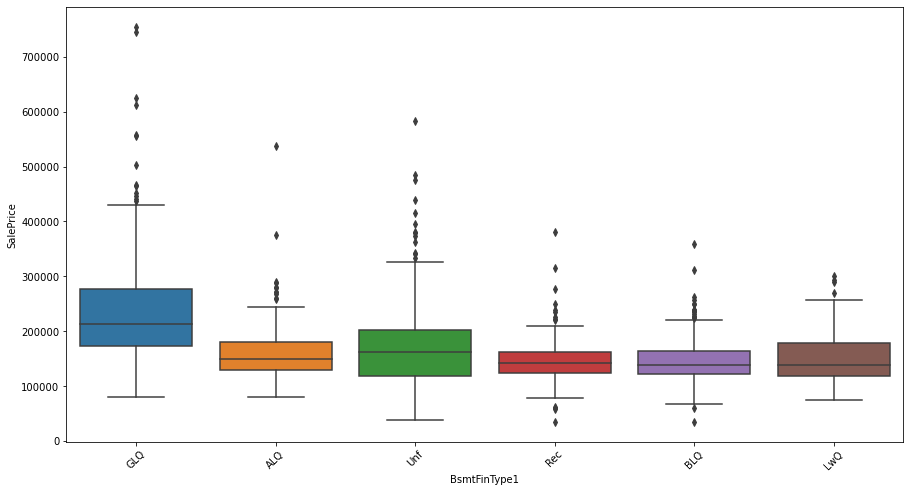

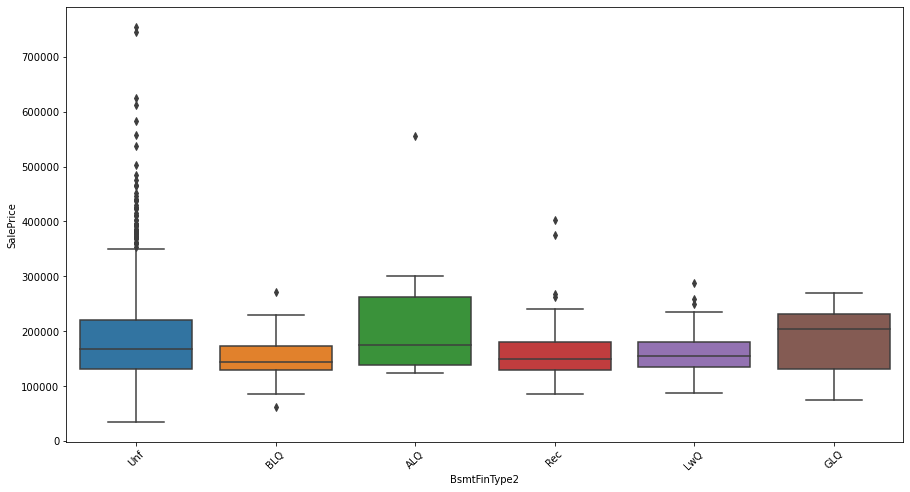

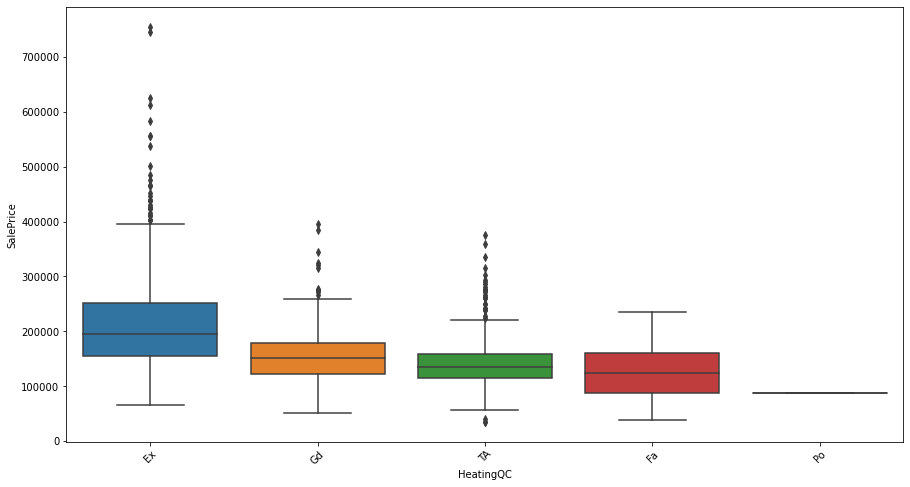

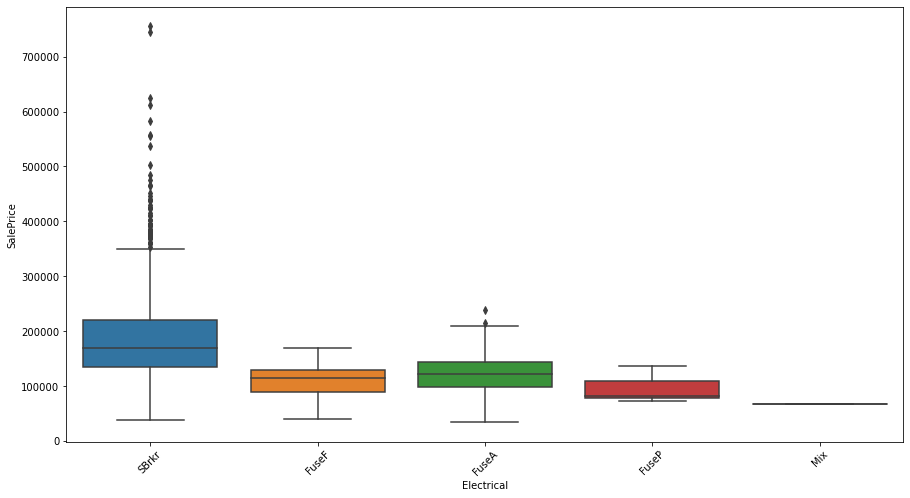

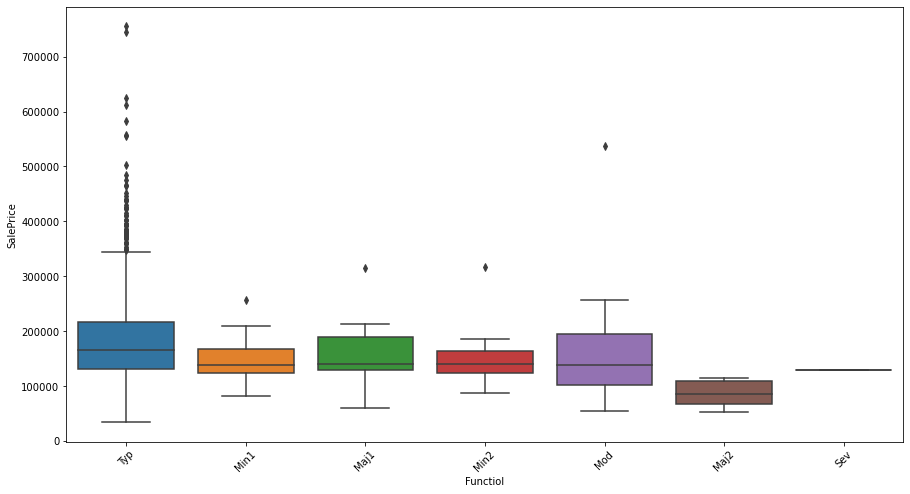

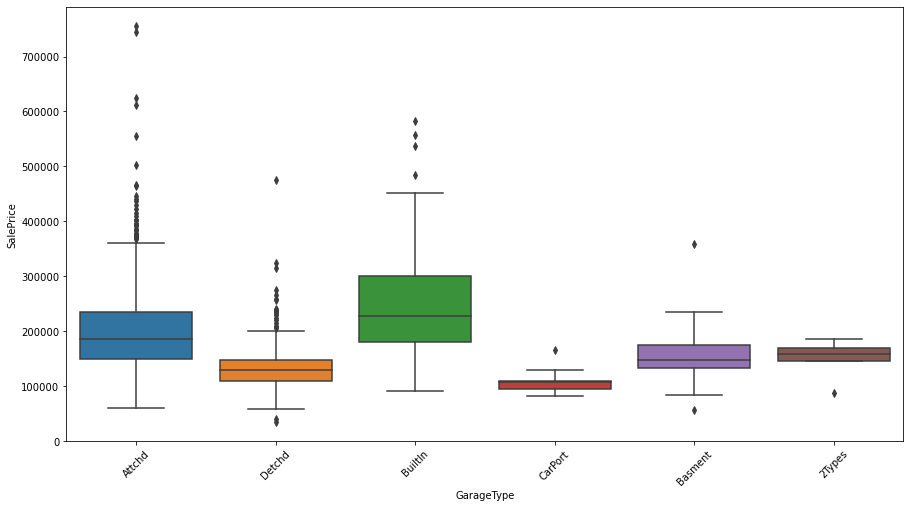

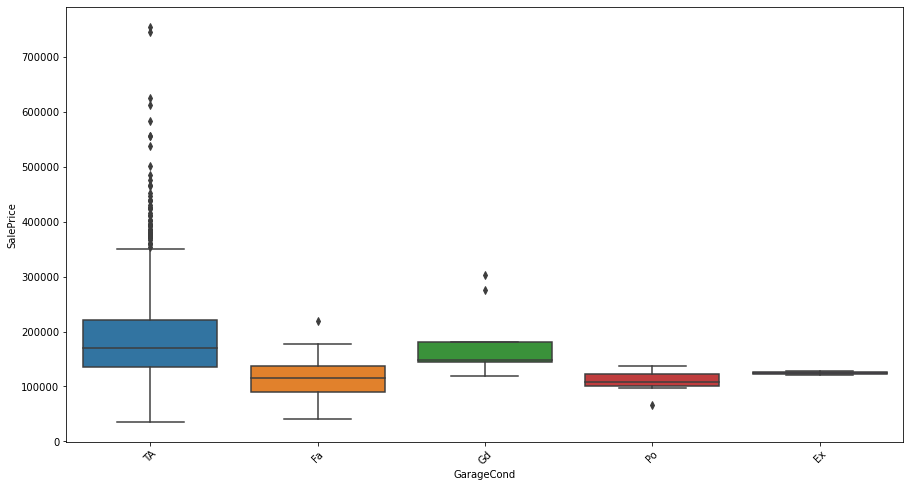

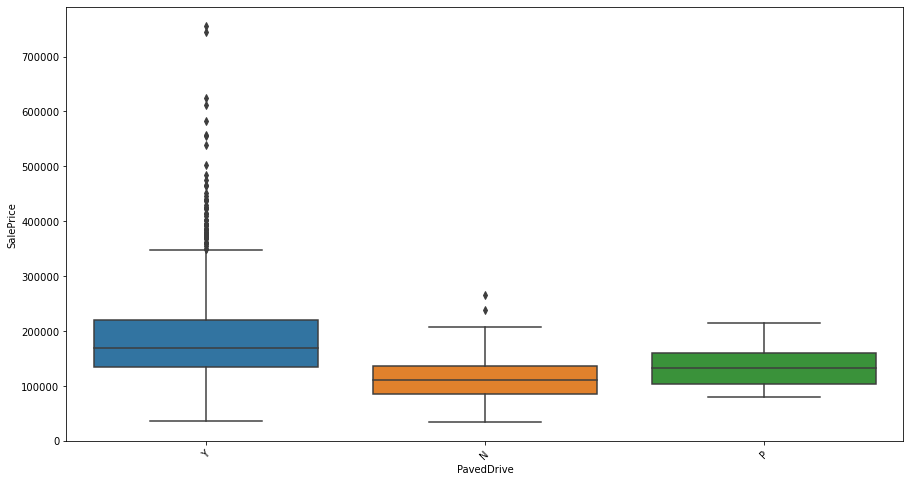

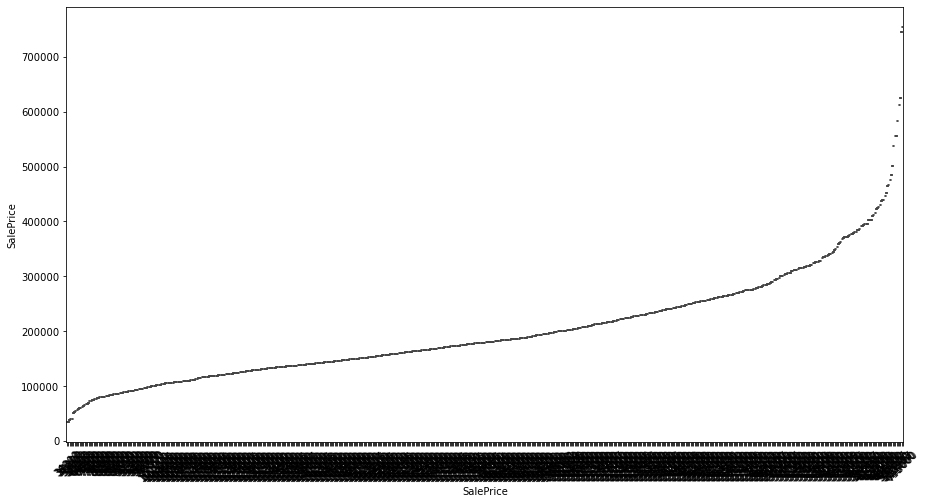

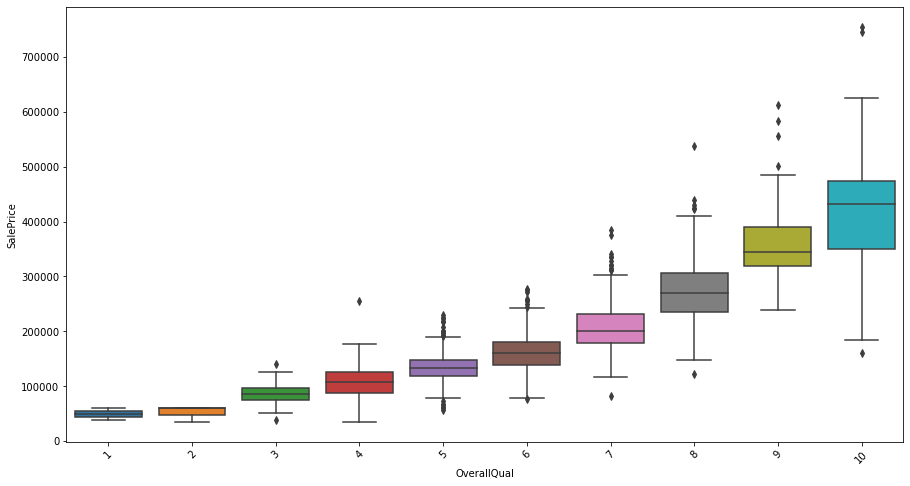

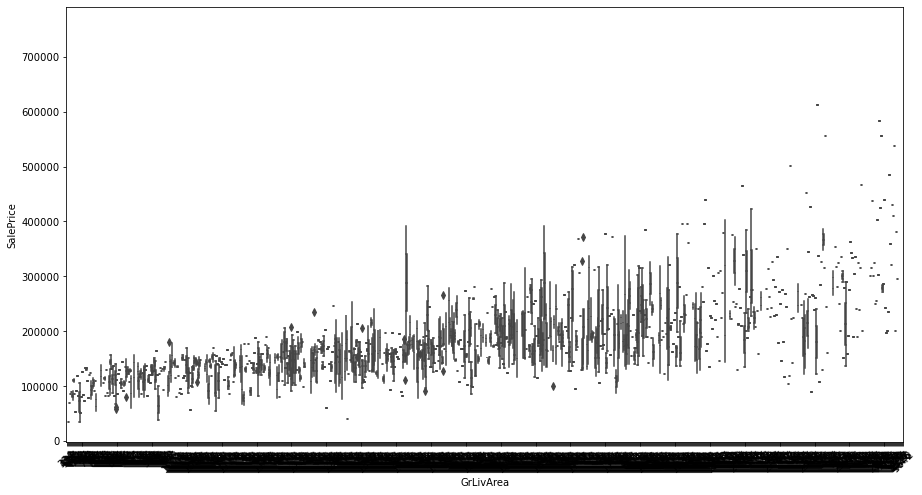

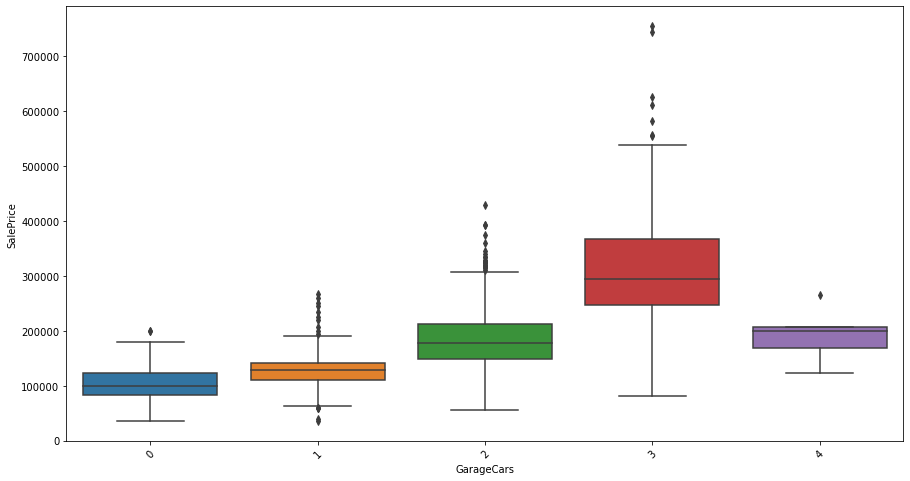

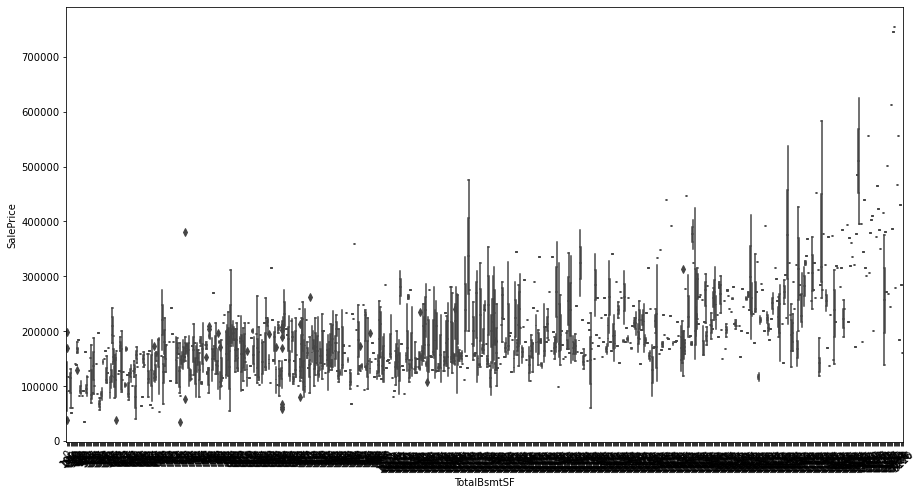

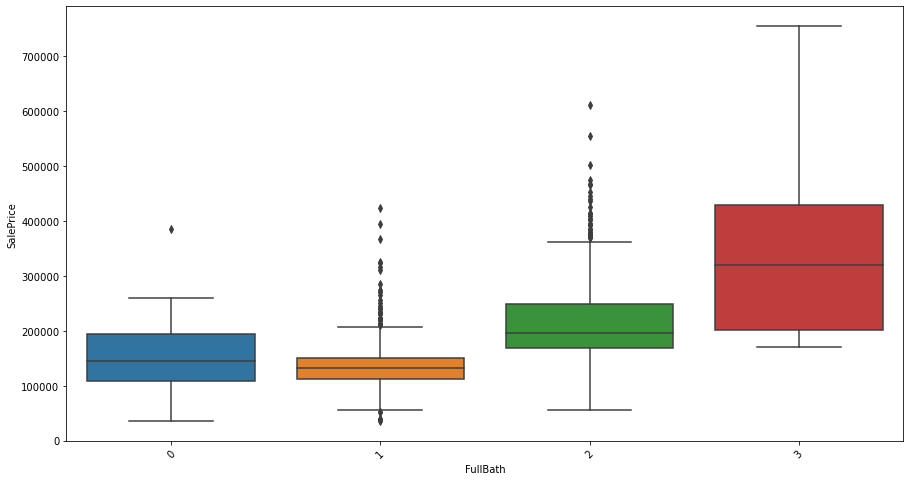

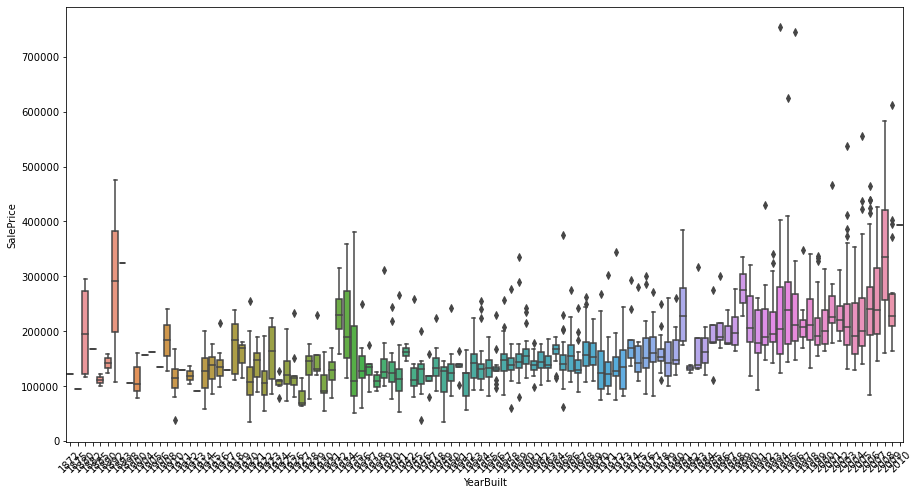

In [128]:
for cols in imp_df.columns:
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=45)
    sns.boxplot(cols,'SalePrice',data=df)